In [17]:
import pandas as pd


# Load "mpd2020.xlsx" (Historical GDP and Population Data)
#mpd_df = pd.read_excel(r"C:\Users\AlexChacon\Downloads\mpd2020.xlsx", sheet_name="Full data")

# Load "FeedGrains.csv" (Agricultural Data)
feedgrains_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\FeedGrains.csv", header=None)

# Load "owid-co2-data.csv" (CO₂ Data)
#co2_df = pd.read_csv(r"C:\Users\AlexChacon\Downloads\owid-co2-data (1).csv")

# === Assign Column Names to FeedGrains Dataset ===
feedgrains_df.columns = ["col1", "category", "col3", "commodity", "col5", "col6", 
                         "country", "col8", "col9", "col10", "metric", "col12", 
                         "unit", "year", "col15", "period", "col17", "market_type", 
                         "yield"]

# === Filter Relevant Columns from CO2 Dataset ===
#co2_df_filtered = co2_df[["country", "year", "co2", "co2_per_capita", "population", "gdp"]]

# === Merge Datasets ===

# Step 1: Merge MPD with FeedGrains using left join (keep all from MPD)
#combined_df = pd.merge(feedgrains_df, mpd_df, on=["country", "year"], how="left")

# Step 2: Merge with CO2 data using left join (still preserving MPD as base)
#final_combined_df = pd.merge(combined_df, co2_df_filtered, on=["country", "year"], how="left")
final_combined_df = feedgrains_df
# === Save the Final Dataset (Without Dropping NaNs) ===
#final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data2.csv", index=False)

# === Display Some Info ===
#print(f"Number of entries in MPD (base dataset): {len(mpd_df)}")
print(f"Number of entries in final combined dataset: {len(final_combined_df)}")
print(final_combined_df.head())



Number of entries in final combined dataset: 524369
          col1        category               col3            commodity  \
0  SC_Group_ID   SC_Group_Desc  SC_GroupCommod_ID  SC_GroupCommod_Desc   
1            2  Supply and use                  9               Barley   
2            2  Supply and use                  9               Barley   
3            2  Supply and use                  9               Barley   
4            2  Supply and use                  9               Barley   

              col5       col6                    country             col8  \
0  SC_Geography_ID  SortOrder  SC_GeographyIndented_Desc  SC_Commodity_ID   
1                1      0.800              United States                1   
2                1      0.800              United States                1   
3                1      0.800              United States                1   
4                1      0.800              United States                1   

                col9            col10   

C:\Users\Admin\AppData\Local\Temp\ipykernel_16768\1351031058.py:8: DtypeWarning: Columns (0,2,4,5,7,9,11,13,14,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  feedgrains_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\FeedGrains.csv", header=None)


In [18]:
print(final_combined_df.columns)
print(len(final_combined_df.columns))

Index(['col1', 'category', 'col3', 'commodity', 'col5', 'col6', 'country',
       'col8', 'col9', 'col10', 'metric', 'col12', 'unit', 'year', 'col15',
       'period', 'col17', 'market_type', 'yield'],
      dtype='object')
19


In [19]:
# Rename the columns in the final combined dataset
final_combined_df.columns = ['SC_Group_ID', 'SC_Group_Desc', 'SC_GroupCommod_ID', 'SC_GroupCommod_Desc', 
                            'SC_Geography_ID', 'SortOrder', 'SC_GeographyIndented_Desc', 'SC_Commodity_ID', 
                            'SC_Commodity_Desc', 'SC_Attribute_ID', 'SC_Attribute_Desc', 'SC_Unit_ID', 
                            'SC_Unit_Desc', 'Year_ID', 'SC_Frequency_ID', 'SC_Frequency_Desc', 'Timeperiod_ID', 
                            'Timeperiod_Desc', 'Amount', 
                             #'countrycode', 'gdppc', 'pop', 'co2', 'co2_per_capita', 'population', 'gdp'
                            ]
# Drop the second row of the final combined dataset
final_combined_df.drop(0, inplace=True)
print(final_combined_df)

       SC_Group_ID        SC_Group_Desc SC_GroupCommod_ID SC_GroupCommod_Desc  \
1                2       Supply and use                 9              Barley   
2                2       Supply and use                 9              Barley   
3                2       Supply and use                 9              Barley   
4                2       Supply and use                 9              Barley   
5                2       Supply and use                 9              Barley   
...            ...                  ...               ...                 ...   
524364           3  Exports and imports                17                Oats   
524365           3  Exports and imports                17                Oats   
524366           3  Exports and imports                17                Oats   
524367           3  Exports and imports                17                Oats   
524368           3  Exports and imports                17                Oats   

       SC_Geography_ID Sort

In [20]:
# Check whether the second row is deleted
print(final_combined_df.head())

  SC_Group_ID   SC_Group_Desc SC_GroupCommod_ID SC_GroupCommod_Desc  \
1           2  Supply and use                 9              Barley   
2           2  Supply and use                 9              Barley   
3           2  Supply and use                 9              Barley   
4           2  Supply and use                 9              Barley   
5           2  Supply and use                 9              Barley   

  SC_Geography_ID SortOrder SC_GeographyIndented_Desc SC_Commodity_ID  \
1               1     0.800             United States               1   
2               1     0.800             United States               1   
3               1     0.800             United States               1   
4               1     0.800             United States               1   
5               1     0.800             United States               1   

  SC_Commodity_Desc SC_Attribute_ID         SC_Attribute_Desc SC_Unit_ID  \
1            Barley               3  Yield per harvested a

In [21]:
print(final_combined_df.describe())

        SC_Group_ID        SC_Group_Desc  SC_GroupCommod_ID  \
count        524368               524368           516928.0   
unique           14                    7               26.0   
top               3  Exports and imports               12.0   
freq         436625               458736           243774.0   

       SC_GroupCommod_Desc  SC_Geography_ID  SortOrder  \
count               516928           524368   524368.0   
unique                  13              301      301.0   
top                   Corn                1        0.8   
freq                254332            35463    35463.0   

       SC_GeographyIndented_Desc  SC_Commodity_ID SC_Commodity_Desc  \
count                     524368           524368            524368   
unique                       272              151                78   
top                United States                2              Corn   
freq                       41914            84001             86539   

        SC_Attribute_ID              

In [22]:
print(final_combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524368 entries, 1 to 524368
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   SC_Group_ID                524368 non-null  object
 1   SC_Group_Desc              524368 non-null  object
 2   SC_GroupCommod_ID          516928 non-null  object
 3   SC_GroupCommod_Desc        516928 non-null  object
 4   SC_Geography_ID            524368 non-null  object
 5   SortOrder                  524368 non-null  object
 6   SC_GeographyIndented_Desc  524368 non-null  object
 7   SC_Commodity_ID            524368 non-null  object
 8   SC_Commodity_Desc          524368 non-null  object
 9   SC_Attribute_ID            524368 non-null  object
 10  SC_Attribute_Desc          524368 non-null  object
 11  SC_Unit_ID                 524368 non-null  object
 12  SC_Unit_Desc               524368 non-null  object
 13  Year_ID                    524368 non-null  

In [23]:
print(final_combined_df.isnull().sum())

SC_Group_ID                     0
SC_Group_Desc                   0
SC_GroupCommod_ID            7440
SC_GroupCommod_Desc          7440
SC_Geography_ID                 0
SortOrder                       0
SC_GeographyIndented_Desc       0
SC_Commodity_ID                 0
SC_Commodity_Desc               0
SC_Attribute_ID                 0
SC_Attribute_Desc               0
SC_Unit_ID                      0
SC_Unit_Desc                    0
Year_ID                         0
SC_Frequency_ID                 0
SC_Frequency_Desc               0
Timeperiod_ID                   0
Timeperiod_Desc                 0
Amount                          0
dtype: int64


In [24]:
# Check whether there are any missing values in the final combined dataset and whether each column is skew or not. 
# import matplotlib.pyplot as plt
# final_combined_df.hist(bins=50, figsize=(20, 15), color='purple')
# plt.show()

In [25]:
#check the minimum year and maximum year in the final combined dataset
year = final_combined_df['Year_ID'].astype(int)
print(year.min())
print(year.max())
# The intervals are as follows:
#1866 - 1886 as 1
#1887 - 1907 as 2
#1908 - 1928 as 3
#1929 - 1949 as 4
#1950 - 1970 as 5
#1971 - 1991 as 6
#1992 - 2012 as 7
#2013 - 2025 as 8

1866
2025


In [26]:
# Drop countrycode column which is not needed for the analysis
#final_combined_df = final_combined_df.drop('countrycode', axis=1)

In [27]:
# Ensure Year_ID is float
final_combined_df['Year_ID'] = final_combined_df['Year_ID'].astype(float)

# Define the intervals
intervals = [
    (1866, 1886),
    (1887, 1907),
    (1908, 1928),
    (1929, 1949),
    (1950, 1970),
    (1971, 1991),
    (1992, 2012),
    (2013, 2025)
]

# Function to assign year range label
def get_year_range(year):
    try:
        year = int(year)
        for idx, (start, end) in enumerate(intervals, start=1):
            if start <= year <= end:
                return idx
    except (ValueError, TypeError):
        return None
    return None

# Create a new column for year range
final_combined_df['Year_Range'] = final_combined_df['Year_ID'].apply(get_year_range)

# Preview result
print(final_combined_df[['Year_ID', 'Year_Range']].head())


   Year_ID  Year_Range
1   2005.0           7
2   2006.0           7
3   2007.0           7
4   2008.0           7
5   2009.0           7


In [28]:
# Convert this dataset to a new CSV file
final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\data3.csv", index=False)

### EDA and Data Preprocessing Process

In [29]:
#Check the unique values in the 'countrycode' column

# Strip column names to remove any accidental spaces
final_combined_df.columns = final_combined_df.columns.str.strip()

# Now assign to locations
locations = final_combined_df['SC_GeographyIndented_Desc'].unique()

# Check the result
print(locations)


['United States' '  World less U.S.' 'U.S. - Central IL'
 'U.S. - Gulf ports, LA' 'U.S. - Omaha, NE' 'U.S. - Chicago, IL'
 'U.S. - Kansas City, MO' 'U.S. - Toledo, OH' 'U.S. - Memphis, TN'
 'U.S. - Minneapolis, MN' 'World' 'U.S. - Midwest' 'U.S. - AR points'
 'U.S. - IL points, IL' 'U.S. - Central US' 'U.S. - AR'
 'U.S. - Domestic, East Coast' 'U.S. - New York, NY' '  Latin America'
 '      Central America' '      Caribbean' '      South America'
 '        European Union-15' '    Asia and Middle East'
 '      Middle East' '        South Asia' 'U.S. - Lawrenceburg, IN'
 'U.S. - St Louis, MO' '        Southeast Asia' '    Oceania'
 '      North Africa' '    Africa' '      Sub-Saharan Africa'
 '    Western Hemisphere' '      North America' '    Europe/Eurasia'
 '      European Union-25' '        Acceding-10' '      Asia'
 '      Other Europe' '      Former Soviet Union-12' '        East Asia'
 '        Canada' '        Greenland' '        Mexico' '        Guatemala'
 '        El Salvador'

In [30]:
locations = [location.strip() for location in locations]
print(locations)

['United States', 'World less U.S.', 'U.S. - Central IL', 'U.S. - Gulf ports, LA', 'U.S. - Omaha, NE', 'U.S. - Chicago, IL', 'U.S. - Kansas City, MO', 'U.S. - Toledo, OH', 'U.S. - Memphis, TN', 'U.S. - Minneapolis, MN', 'World', 'U.S. - Midwest', 'U.S. - AR points', 'U.S. - IL points, IL', 'U.S. - Central US', 'U.S. - AR', 'U.S. - Domestic, East Coast', 'U.S. - New York, NY', 'Latin America', 'Central America', 'Caribbean', 'South America', 'European Union-15', 'Asia and Middle East', 'Middle East', 'South Asia', 'U.S. - Lawrenceburg, IN', 'U.S. - St Louis, MO', 'Southeast Asia', 'Oceania', 'North Africa', 'Africa', 'Sub-Saharan Africa', 'Western Hemisphere', 'North America', 'Europe/Eurasia', 'European Union-25', 'Acceding-10', 'Asia', 'Other Europe', 'Former Soviet Union-12', 'East Asia', 'Canada', 'Greenland', 'Mexico', 'Guatemala', 'El Salvador', 'Honduras', 'Belize', 'Panama', 'Nicaragua', 'Costa Rica', 'Jamaica', 'Bermuda', 'Bahamas', 'Turks And Caicos Islands', 'Cayman Islands',

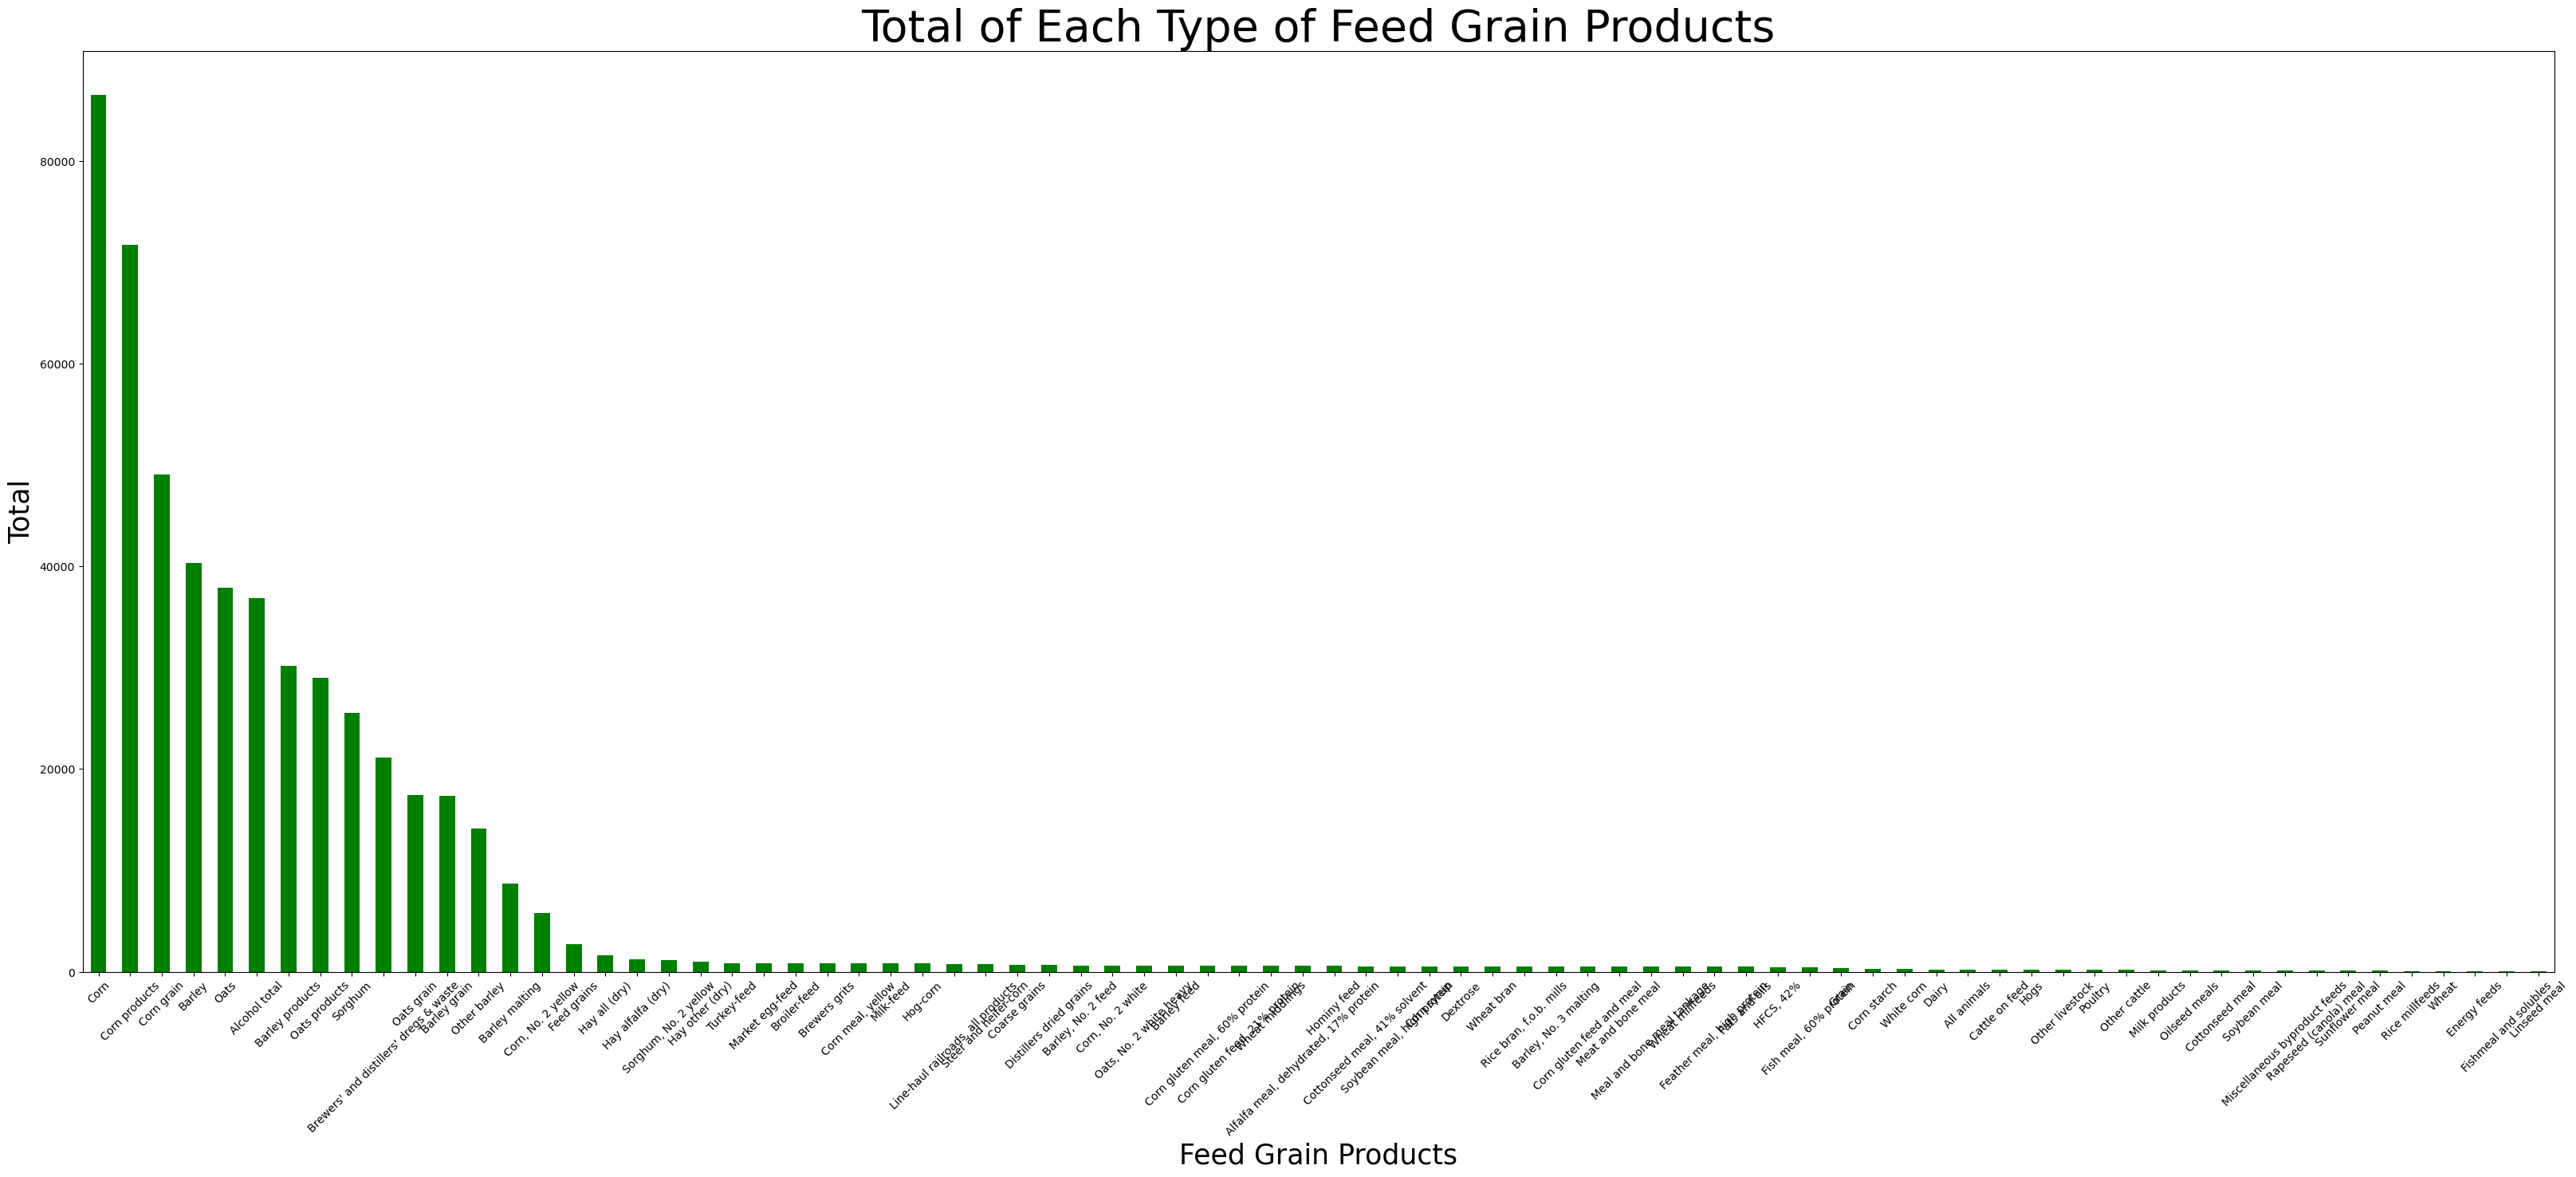

In [31]:
# Create histogram of the unique values of products in the 'SC_Commodity_Desc' column
import matplotlib.pyplot as plt
final_combined_df['SC_Commodity_Desc'].value_counts().plot(kind='bar', figsize=(40, 15), color='green')
plt.title('Total of Each Type of Feed Grain Products', fontsize=40)
plt.xlabel('Feed Grain Products', fontsize=25)
plt.ylabel('Total', fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [32]:
# Check unique values in the 'SC_Commodity_Desc' column and SC_GroupCommod_Desc column
print(final_combined_df['SC_Commodity_Desc'].unique())
print()
print(final_combined_df['SC_GroupCommod_Desc'].unique())
print(final_combined_df['SC_GroupCommod_ID'].unique())

['Barley' 'Feed grains' 'Coarse grains' 'Hay alfalfa (dry)' 'Corn'
 'Hay other (dry)' 'Hay all (dry)' 'Corn grain' 'Oats' 'All animals'
 'Barley feed' 'Barley malting' 'Broiler-feed' 'Market egg-feed'
 'Steer and heifer-corn' 'Hog-corn' 'Milk-feed' 'Turkey-feed' 'Grain'
 'Line-haul railroads, all products' 'Corn gluten feed and meal'
 'Meal and bone meal tankage' 'Wheat millfeeds' 'Dairy' 'Cattle on feed'
 'Other cattle' 'Fats and oils' 'Poultry' 'Other livestock' 'Sorghum'
 'Corn, No. 2 yellow' 'Sorghum, No. 2 yellow' 'Distillers dried grains'
 'Soybean meal, high protein' 'Corn meal, yellow' 'Brewers grits'
 'Alfalfa meal, dehydrated, 17% protein' 'Corn, No. 2 white' 'Wheat bran'
 'Wheat middlings' 'Cottonseed meal, 41% solvent' 'Barley, No. 2 feed'
 'Oats, No. 2 white heavy' 'Barley, No. 3 malting' 'Corn syrup'
 'Feather meal, high protein' 'Hominy feed' 'Meat and bone meal'
 'Rice bran, f.o.b. mills' 'Fish meal, 60% protein' 'Barley grain'
 'Oats grain' 'Oats products' 'Other barle

In [33]:
# Drop unwanted columns
columns_to_drop = [
    'SC_Group_ID', 'SortOrder', 'SC_Commodity_ID',
     'SC_Commodity_Desc', 'SC_Attribute_ID', 'SC_Attribute_Desc', 'SC_Frequency_ID', 'Timeperiod_ID', 
   # 'pop', 'co2', 'gdppc'
]

final_combined_df = final_combined_df.drop(columns=columns_to_drop, errors='ignore')

# Rename remaining columns
columns_to_rename = {
    'SC_Group_Desc': 'Commodity_Supply_Measure',
    'SC_GroupCommod_Desc': 'Commodity_Type',
    'SC_GeographyIndented_Desc': 'Location',
    'SC_Unit_Desc': 'Price_Meaurement_Type',
    'SC_Frequency_Desc': 'Price_Measurement_Frequency',
    'Timeperiod_Desc': 'Price_Measurement_Timeperiod',
    'Amount': 'Price', 'Year_ID': 'Year', 'SC_Geography_ID': 'Location_ID', 'SC_GroupCommod_ID': 'Commodity_ID', 'SC_Unit_ID' : 'Price_Measurement_ID'
}

final_combined_df = final_combined_df.rename(columns=columns_to_rename)

#final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_corrected_labels.csv", index=False)

final_combined_df.head()

# Convert the 'Price' column to float
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Optionally, drop rows where conversion failed (NaN values)
final_combined_df = final_combined_df.dropna(subset=['Price'])
print(final_combined_df)

       Commodity_Supply_Measure Commodity_ID Commodity_Type Location_ID  \
1                Supply and use            9         Barley           1   
2                Supply and use            9         Barley           1   
3                Supply and use            9         Barley           1   
4                Supply and use            9         Barley           1   
5                Supply and use            9         Barley           1   
...                         ...          ...            ...         ...   
524364      Exports and imports           17           Oats         300   
524365      Exports and imports           17           Oats         300   
524366      Exports and imports           17           Oats         300   
524367      Exports and imports           17           Oats         300   
524368      Exports and imports           17           Oats         300   

                         Location Price_Measurement_ID Price_Meaurement_Type  \
1                  

                         Price  Price_Measurement_ID
Price                 1.000000             -0.019284
Price_Measurement_ID -0.019284              1.000000


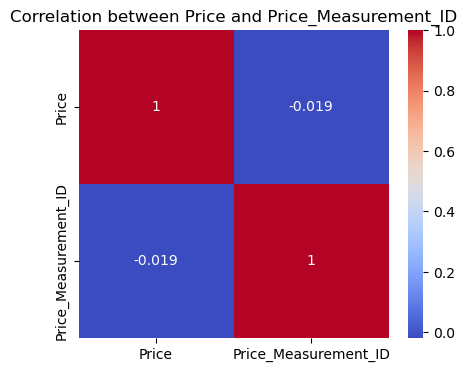

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Price' and 'Price_Measurement_ID' are floats
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')
final_combined_df['Price_Measurement_ID'] = pd.to_numeric(final_combined_df['Price_Measurement_ID'], errors='coerce')

# Drop rows with missing values in either column
final_combined_df = final_combined_df.dropna(subset=['Price', 'Price_Measurement_ID'])

# Compute the correlation matrix
correlation_matrix = final_combined_df[['Price', 'Price_Measurement_ID']].corr()
print(correlation_matrix)

# Optional: visualize it
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Price and Price_Measurement_ID')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16768\3260510025.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Measurement_ID', y='Price', data=avg_price_by_measurement, palette='viridis')


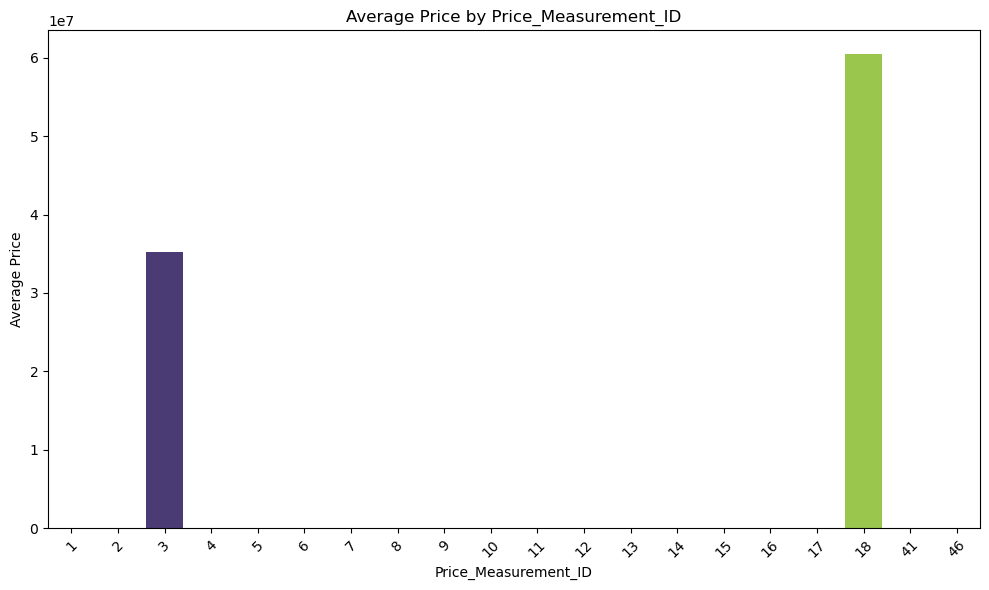

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct types
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')
final_combined_df['Price_Measurement_ID'] = pd.to_numeric(final_combined_df['Price_Measurement_ID'], errors='coerce')

# Drop rows with missing values in either column
filtered_df = final_combined_df.dropna(subset=['Price', 'Price_Measurement_ID'])

# Calculate average price per Price_Measurement_ID
avg_price_by_measurement = filtered_df.groupby('Price_Measurement_ID')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_Measurement_ID', y='Price', data=avg_price_by_measurement, palette='viridis')
plt.title('Average Price by Price_Measurement_ID')
plt.xlabel('Price_Measurement_ID')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
# Get unique type-to-ID mapping
unique_price_types = final_combined_df[['Price_Meaurement_Type', 'Price_Measurement_ID']].drop_duplicates()

# Get counts of each Price_Measurement_ID from final_combined_df
price_measurement_counts = final_combined_df['Price_Measurement_ID'].value_counts().reset_index()
price_measurement_counts.columns = ['Price_Measurement_ID', 'Count']

# Merge counts with type-ID mapping
combined_info = pd.merge(unique_price_types, price_measurement_counts, on='Price_Measurement_ID', how='left')

# Display the result
print(combined_info.sort_values(by='Count', ascending=False))



   Price_Meaurement_Type  Price_Measurement_ID   Count
3      1,000 metric tons                     7  419845
17          1,000 liters                    17   35967
1     Dollars per bushel                     4   16781
4        Million bushels                     1   12628
6        Dollars per ton                    12    9860
14               Bushels                     3    9231
9                  Ratio                    13    4927
12       Dollars per cwt                     5    4813
2    Million metric tons                     8    2717
15       Cents per pound                    14    1514
8   Million animal units                    46    1400
13         Million acres                     2     966
16               Gallons                    18     938
11      Index (1984=100)                    15     729
0       Bushels per acre                     6     573
7             1,000 tons                     9     468
10   Carloads originated                    16     384
5         

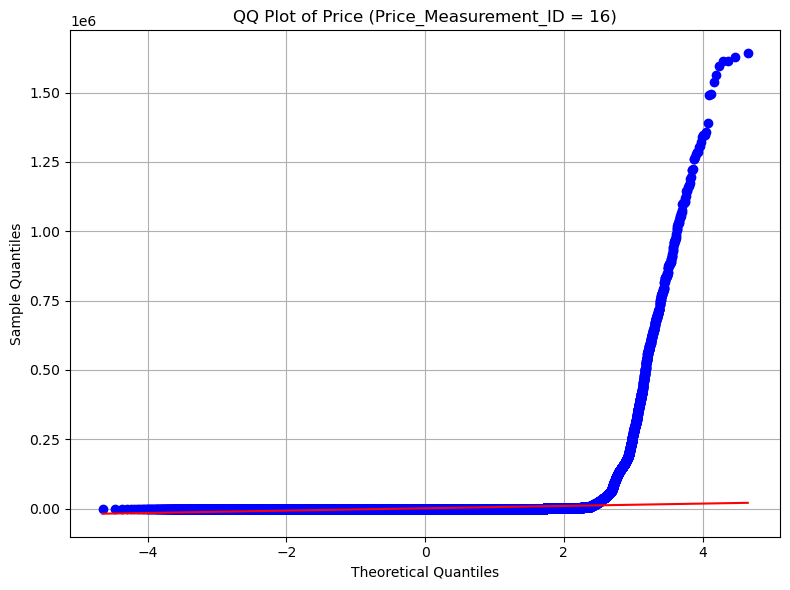

In [37]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Filter for rows with Price_Measurement_ID == 7
price_data = final_combined_df[final_combined_df['Price_Measurement_ID'] == 7]['Price'].dropna()

# Create QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(price_data, dist="norm", plot=plt)
plt.title("QQ Plot of Price (Price_Measurement_ID = 16)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.tight_layout()
plt.show()
#most closely follow: 4, 13, 5, 8, 14, 46 , 2, 15, 6, 9, 16, 10, 11,  41

In [38]:
# Conversion factor from short tons to metric tons
conversion_factor = 0.90718474

# Mask for the rows where the price needs to be converted
mask = final_combined_df['Price_Measurement_ID'] == 12

# Update the Price column for those rows
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] / conversion_factor


In [39]:
#Price Measurement Cleaning
#dollars /bushel to dollar / metric ton 
unique_commodities = final_combined_df[final_combined_df['Price_Measurement_ID'] == 4]['Commodity_Type'].dropna().unique()
print(unique_commodities)
#SOURCE : https://grains.org/markets-tools-data/tools/converting-grain-units/
#barley = 1 bushel = .021772 metric ton
#corn&sorghum = 1 bushel = .0254 metric ton
#oats = 1 bushel = .0272155 metric ton
# Define conversion factors (bushel → metric ton)
bushel_to_metric_ton = {
    'barley': 0.021772,
    'corn': 0.0254,
    'sorghum': 0.0254,
    'oats': 0.0272155
}

# Create a mask for rows with Price_Measurement_ID == 4
mask = final_combined_df['Price_Measurement_ID'] == 4

# Create a copy to avoid modifying the original DataFrame
#df_final_combined_df = final_combined_df.copy()

# Apply conversion where applicable
for commodity, factor in bushel_to_metric_ton.items():
    commodity_mask = (final_combined_df['Commodity_Type'].str.lower() == commodity) & mask
    final_combined_df.loc[commodity_mask, 'Price'] = final_combined_df.loc[commodity_mask, 'Price'] / factor 
    final_combined_df.loc[commodity_mask, 'Price_Measurement_ID'] = 12  # Change to price per metric ton


['Barley' 'Corn' 'Oats' 'Sorghum']


In [40]:
# Conversion factor: 1 dollar per cwt = ~22.0462 dollars per metric ton
cwt_to_metric_ton_factor = 2204.62 / 100  # ≈ 22.0462

# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Mask for rows with Price_Measurement_ID == 5 (dollars per cwt)
mask = final_combined_df['Price_Measurement_ID'] == 5

# Apply conversion: dollars per cwt → dollars per metric ton
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * cwt_to_metric_ton_factor

# Update measurement ID to 12 (dollars per metric ton)
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 12



In [41]:
# Conversion factor: 1 cent per pound = 22.0462 dollars per metric ton
cents_to_dollars_per_metric_ton_factor = 2204.62 / 100  # ≈ 22.0462

# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Mask for Price_Measurement_ID == 14 (cents per pound)
mask = final_combined_df['Price_Measurement_ID'] == 14

# Apply conversion in-place for these rows
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * cents_to_dollars_per_metric_ton_factor

# Update Price_Measurement_ID to 12 (for dollars per metric ton)
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 12



In [42]:
# Conversion factor: dollars per metric ton to dollars per 1000 metric tons
dollars_per_metric_ton_to_1000_metric_tons_factor = 1000

# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Mask for Price_Measurement_ID == 12 (dollars per metric ton)
mask = final_combined_df['Price_Measurement_ID'] == 12

# Apply conversion in-place for these rows
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * dollars_per_metric_ton_to_1000_metric_tons_factor


In [43]:
#metric ton = xdensity/1000. 
final_combined_df['Commodity_Type'] = final_combined_df['Commodity_Type'].astype(str).str.strip()

# Filter and get unique Commodity_Type values where Price_Measurement_ID is 17
unique_commodities_id_7 = final_combined_df[final_combined_df['Price_Measurement_ID'] == 17]['Commodity_Type'].dropna().unique()

# Print the result
print("Unique Commodity_Type values for Price_Measurement_ID = 17:")
print(unique_commodities_id_7)

Unique Commodity_Type values for Price_Measurement_ID = 17:
['Corn']


In [44]:
# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Define conversion factor: 1000 liters = 0.721 metric tons → convert to price per 1000 metric tons
conversion_factor = 1000 / 0.721

# Apply conversion only to rows where Price_Measurement_ID == 17
mask = final_combined_df['Price_Measurement_ID'] == 17

# Convert Price and update Measurement ID
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * conversion_factor
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 7

# Optional: Preview updated rows
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 7][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


    Commodity_Type    Price  Price_Measurement_ID
227  Coarse grains  10932.0                     7
228  Coarse grains  14354.0                     7
229  Coarse grains  15520.0                     7
230  Coarse grains  15977.0                     7
231  Coarse grains  17714.0                     7


In [45]:
# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Conversion factor: from per 1 million → per 1
conversion_factor = 1000000

# Mask for Price_Measurement_ID == 1
mask = final_combined_df['Price_Measurement_ID'] == 1

# Apply the conversion
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * conversion_factor 

# Update the measurement ID to 3 (per bushel)
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 3

# Optional: Preview result
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 3][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


    Commodity_Type       Price  Price_Measurement_ID
585         Barley  18095000.0                     3
586         Barley  23850000.0                     3
587         Barley  23200000.0                     3
588         Barley  29099000.0                     3
589         Barley  29047000.0                     3


In [46]:
# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Conversion factor: from million metric tons → 1000 metric tons
conversion_factor = 1000

# Mask for Price_Measurement_ID == 8
mask = final_combined_df['Price_Measurement_ID'] == 8

# Apply the conversion and update measurement ID
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * conversion_factor
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 7

# Optional: Preview updated rows
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 7][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


    Commodity_Type          Price  Price_Measurement_ID
150    Feed grains   26989.689843                     7
151    Feed grains  202937.809747                     7
152    Feed grains  138847.885941                     7
153    Feed grains   85193.282114                     7
154    Feed grains   38132.004489                     7


In [47]:
# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Conversion factor: from million acres → 1000 acres
conversion_factor = 1000

# Mask for Price_Measurement_ID == 2
mask = final_combined_df['Price_Measurement_ID'] == 2

# Apply conversion and update measurement ID
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * conversion_factor
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 10

# Optional: Preview updated rows
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 10][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


    Commodity_Type   Price  Price_Measurement_ID
902            Hay  8647.0                    10
903            Hay  9015.0                    10
904            Hay  9165.0                    10
905            Hay  9275.0                    10
906            Hay  9764.0                    10


In [48]:
# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Conversion factor: gallons → 1000 metric tons
conversion_factor = 268.47 * 1000  # 1000 metric tons worth of gallons

# Mask for rows with Price_Measurement_ID == 18
mask = final_combined_df['Price_Measurement_ID'] == 18

# Apply conversion and update measurement ID
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * conversion_factor
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 7

# Optional: Preview updated rows
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 7][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())

    Commodity_Type          Price  Price_Measurement_ID
150    Feed grains   26989.689843                     7
151    Feed grains  202937.809747                     7
152    Feed grains  138847.885941                     7
153    Feed grains   85193.282114                     7
154    Feed grains   38132.004489                     7


In [49]:
# Step 1: Define the conversion factor
#conversion_factor = 2.2417  # 1 ton/acre = 2.2417 metric tons/hectare

# Step 2: Apply conversion to rows where Price_Measurement_ID == 11
#mask = final_combined_df['Price_Measurement_ID'] == 11
#final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] * conversion_factor

# Step 3: Update the Price_Measurement_ID from 11 to 7
#final_combined_df.loc[mask, 'Price_Measurement_ID'] = 7


In [50]:
# Filter for rows where Price_Measurement_ID is 6 and get unique Commodity_Types
unique_commodities_id6 = final_combined_df.loc[final_combined_df['Price_Measurement_ID'] == 6, 'Commodity_Type'].unique()

# Print the unique commodity types
print(unique_commodities_id6)


['Barley' 'Corn' 'Sorghum' 'Oats']


In [51]:
# Ensure Price is numeric
#final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Define conversion factors (bushel → metric ton)
#bushel_to_metric_ton = {
 #   'Barley': 0.021772,
  #  'Corn': 0.0254,
   # 'Sorghum': 0.0254,
    #'Oats': 0.0272155
#}

# Mask for rows with Price_Measurement_ID == 6
#mask = final_combined_df['Price_Measurement_ID'] == 6

# Apply conversion for each commodity
#for commodity, factor in bushel_to_metric_ton.items():
 #   commodity_mask = (final_combined_df['Commodity_Type'].str.lower() == commodity) & mask
    
    # Convert price from bushels per acre to 1000 metric tons
  #  final_combined_df.loc[commodity_mask, 'Price'] = final_combined_df.loc[commodity_mask, 'Price'] * factor * 1000
    
    # Update the measurement ID to 7 (1000 metric tons)
   # final_combined_df.loc[commodity_mask, 'Price_Measurement_ID'] = 7

# Optional: Preview the updated rows
#print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 7][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


In [52]:
# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Conversion factor: US ton → 1000 metric ton
us_to_metric = 0.90718474 / 1000

# Mask for rows with Price_Measurement_ID == 9
mask = final_combined_df['Price_Measurement_ID'] == 9

# Convert to metric tons
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] / us_to_metric

# Update measurement ID to 7 (1000 metric tons)
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 7

# Optional: Check updated entries
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 7][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


    Commodity_Type          Price  Price_Measurement_ID
150    Feed grains   26989.689843                     7
151    Feed grains  202937.809747                     7
152    Feed grains  138847.885941                     7
153    Feed grains   85193.282114                     7
154    Feed grains   38132.004489                     7


In [53]:
# Ensure 'Price' is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Conversion factor from US ton to 1000 metric ton
us_to_metric = 0.90718474 / 1000

# Mask for rows with Price_Measurement_ID == 41
mask = final_combined_df['Price_Measurement_ID'] == 41

# Convert the Price from US tons to metric tons
final_combined_df.loc[mask, 'Price'] = final_combined_df.loc[mask, 'Price'] / us_to_metric

# Update the Price_Measurement_ID to 7
final_combined_df.loc[mask, 'Price_Measurement_ID'] = 7

# Optional: Preview updated rows
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 7][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


    Commodity_Type          Price  Price_Measurement_ID
150    Feed grains   26989.689843                     7
151    Feed grains  202937.809747                     7
152    Feed grains  138847.885941                     7
153    Feed grains   85193.282114                     7
154    Feed grains   38132.004489                     7


In [54]:
# Ensure Price is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Normalize Commodity_Type formatting
final_combined_df['Commodity_Type'] = final_combined_df['Commodity_Type'].astype(str).str.strip().str.lower()

# Define conversion factors from bushels to 1000 metric tons
bushel_to_metric_ton = {
    'barley': 0.021772 /1000,
    'corn': 0.0254 / 1000,
    'sorghum': 0.0254 / 1000,
    'oats': 0.0272155 / 1000, 
    'Barley': 0.021772 / 1000,
    'Corn': 0.0254 / 1000,
    'Sorghum': 0.0254/ 1000,
    'Oats': 0.0272155 /1000
}

# Mask for rows with Price_Measurement_ID == 3
mask = final_combined_df['Price_Measurement_ID'] == 3

# Loop through each commodity and apply conversion
for commodity, factor in bushel_to_metric_ton.items():
    commodity_mask = (final_combined_df['Commodity_Type'] == commodity) & mask
    final_combined_df.loc[commodity_mask, 'Price'] = final_combined_df.loc[commodity_mask, 'Price'] / factor
    final_combined_df.loc[commodity_mask, 'Price_Measurement_ID'] = 7 # Update measurement ID

# Optional: Preview updated rows
print(final_combined_df[final_combined_df['Price_Measurement_ID'] == 7][['Commodity_Type', 'Price', 'Price_Measurement_ID']].head())


    Commodity_Type          Price  Price_Measurement_ID
150    feed grains   26989.689843                     7
151    feed grains  202937.809747                     7
152    feed grains  138847.885941                     7
153    feed grains   85193.282114                     7
154    feed grains   38132.004489                     7


In [55]:
# Get unique type-to-ID mapping
unique_price_types = final_combined_df[['Price_Meaurement_Type', 'Price_Measurement_ID']].drop_duplicates()

# Get counts of each Price_Measurement_ID from final_combined_df
price_measurement_counts = final_combined_df['Price_Measurement_ID'].value_counts().reset_index()
price_measurement_counts.columns = ['Price_Measurement_ID', 'Count']

# Merge counts with type-ID mapping
combined_info = pd.merge(unique_price_types, price_measurement_counts, on='Price_Measurement_ID', how='left')

# Display the result
print(combined_info.sort_values(by='Count', ascending=False))
#1,000 metric tons=7, Dollars per 1000 metric ton = 12. Ratio = 13, Million animal units = 46, 1000 acres = 10, bushels per acre = 6, tons per acre = 11

   Price_Meaurement_Type  Price_Measurement_ID   Count
19                   Ton                     7  481891
7             1,000 tons                     7  481891
14               Bushels                     7  481891
17          1,000 liters                     7  481891
16               Gallons                     7  481891
4        Million bushels                     7  481891
3      1,000 metric tons                     7  481891
2    Million metric tons                     7  481891
6        Dollars per ton                    12   32968
1     Dollars per bushel                    12   32968
12       Dollars per cwt                    12   32968
15       Cents per pound                    12   32968
9                  Ratio                    13    4927
8   Million animal units                    46    1400
5            1,000 acres                    10    1284
13         Million acres                    10    1284
11      Index (1984=100)                    15     729
0       Bu

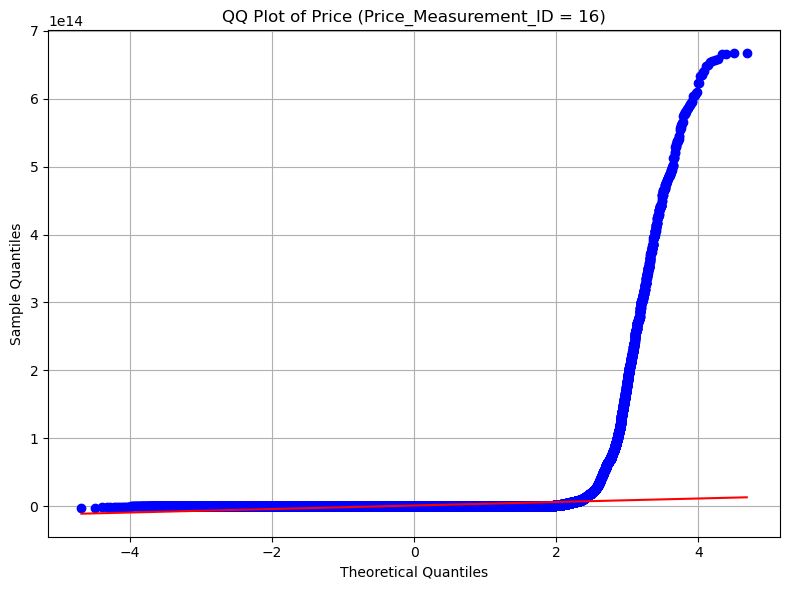

In [56]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Filter for rows with Price_Measurement_ID == 7
price_data = final_combined_df[final_combined_df['Price_Measurement_ID'] == 7]['Price'].dropna()

# Create QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(price_data, dist="norm", plot=plt)
plt.title("QQ Plot of Price (Price_Measurement_ID = 16)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# First, fill any NaNs with a placeholder (e.g., 0), then convert to integer
final_combined_df['Location_ID'] = final_combined_df['Location_ID'].fillna(0).astype(int)
final_combined_df['Commodity_ID'] = final_combined_df['Commodity_ID'].fillna(0).astype(int)
final_combined_df = final_combined_df.dropna(subset=['Commodity_Type'])
final_combined_df['Location_ID'] = final_combined_df['Location_ID'].astype(int)
final_combined_df['Commodity_ID'] = final_combined_df['Commodity_ID'].astype(float)
final_combined_df['Location_ID'] = final_combined_df['Location_ID'].astype(float)


In [58]:
# Check how many missing values left in the dataset
#cleaned_gdp_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv")
#print(cleaned_gdp_df.isnull().sum())

In [59]:
#cleaned_gdp_df.dropna(inplace=True)
#print(cleaned_gdp_df.isnull().sum())
# Save the cleaned DataFrame to a CSV file  
#cleaned_gdp_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv", index=False)
# print how many rows and columns in the cleaned dataset
#print(f"Number of rows: {cleaned_gdp_df.shape[0]}")
#print(f"Number of columns: {cleaned_gdp_df.shape[1]}")

In [60]:
#cleaned_gdp = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv")
#print(cleaned_gdp.head())
#print(cleaned_gdp.isnull().sum())

In [61]:
print(final_combined_df['Location_ID'].unique())

[  1.   2.   3.   4.   6.   7.   8.   9.  10.  11.  25.  14.  15.  18.
  20.  21.  16.  23.  26.  27.  28.  29.  30.  31.  32.  33.  17.   5.
  34.  35.  37.  36.  38.  39.  40.  41.  42.  43.  46.  44.  45.  47.
  49.  48.  51.  52.  54.  55.  53.  58.  56.  57.  62.  59.  60.  63.
  64.  65.  66.  67.  68.  61.  69.  77.  70.  71.  72.  73.  74.  75.
  76.  83.  84.  78.  85.  87.  79.  86.  88.  82.  81.  89.  90.  91.
  96.  97. 100.  92. 101.  93.  94. 103. 104. 106. 108. 105. 113. 114.
 118. 120. 121. 122. 124. 125. 126. 127. 128. 129. 116. 131. 132. 141.
 142. 151. 148. 152. 153. 154. 144. 155. 156. 157. 158. 159. 150. 169.
 160. 161. 170. 172. 162. 173. 174. 163. 175. 177. 179. 180. 178. 164.
 166. 181. 187. 182. 183. 184. 185. 186. 189. 190. 191. 192. 195. 199.
 202. 203. 204. 200. 201. 205. 206. 207. 212. 213. 196. 197. 194. 188.
 130. 143. 149. 115. 168. 133. 134. 135. 119. 109. 112. 102.  99. 243.
 244. 245.  80. 117. 136. 137. 138. 140. 147. 208. 209. 210. 246. 247.
 248. 

In [62]:
import re
import numpy as np

# African countries (No overlaps with other regions)
african_countries = [
    'Mali', 'Guinea', 'Sierra Leone', 'Ivory Coast', 'Ghana', 'The Gambia', 'Niger',
    'Togo', 'Nigeria', 'Gabon', 'Chad', 'St Helena', 'Burkina Faso', 'Benin', 'Guinea-Bissau',
    'Cape Verde Islands', 'Morocco', 'Congo(Kinshasa)', 'Angola', 'Congo(Brazzville)', 'Liberia',
    'Burundi', 'Rwanda', 'Somalia', 'Ethiopia', 'Djibouti', 'Uganda', 'Kenya', 'Seychelles',
    'Tanzania', 'Mauritius', 'Mozambique', 'Madagascar (Malagasy)', 'Algeria', 'Republic Of South Africa',
    'Mayotte', 'Comoros', 'Reunion (Island, French)', 'Namibia', 'Botswana', 'Zambia', 'Swaziland',
    'Zimbabwe', 'Malawi', 'Lesotho', 'Tunisia', 'Egypt', 'Libya', 'Sudan', 'Western Sahara',
    'Equatorial Guinea', 'Mauritania', 'Cameroon', 'Senegal', 'South Sudan', 'Central African Republic', 'North Africa', 'Africa',
    'Eritrea', 'Sub-Saharan Africa', 'Ethiopia, United Ends 6/1993 & New Begin', 'Malagasy'
]

# North American countries (No overlaps with other regions)
north_american_countries = [
    'United States', 'Canada', 'Greenland', 'Mexico',  'U.S. - Central IL', 'U.S. - Gulf ports, LA', 'U.S. - Omaha, NE', 'U.S. - Chicago, IL',
'U.S. - Kansas City, MO', 'U.S. - Toledo, OH', 'U.S. - Memphis, TN', 'U.S. - Minneapolis, MN', 'U.S. - Midwest', 'U.S. - AR points', 'U.S. - IL points, IL', 'U.S. - Central US', 'U.S. - AR',
'U.S. - Domestic, East Coast', 'U.S. - New York, NY', 'U.S. - Lawrenceburg, IN', 'U.S. - St Louis, MO', 'North America', 'Golden Triangle, MT'
]

# South American countries (No overlaps with other regions)
south_american_countries = [
    'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'French Guiana', 'Peru', 'Colombia', 'Bolivia', 'Chile',
    'Brazil', 'Paraguay', 'Uruguay', 'Argentina', 'Latin America', 'Central America'
]

# Caribbean countries (No overlaps with other regions)
caribbean_countries = [
    'Jamaica', 'Bermuda', 'Bahamas', 'Turks And Caicos Islands', 'Cayman Islands', 'Haiti', 'Dominican Republic',
    'Anguilla', 'British Virgin Islands', 'Cuba', 'St. Kitts-Nevis', 'Trinidad And Tobago', 'Antigua & Barbuda',
    'Montserrat', 'Dominica', 'St. Lucia', 'St. Vincent And The Grenadine', 'Grenada', 'Barbados',
    'Netherlands Antilles', 'Martinique', 'Guadeloupe', 'Aruba', 'Curacao', 'Sint Maarten', 'Caribbean', 'Caribbean Basin (CBERA)'
]

# Middle Eastern countries (No overlaps with other regions)
middle_eastern_countries = [
    'Jordan', 'Syria', 'Kuwait', 'Saudi Arabia', 'Lebanon', 'Qatar', 'United Arab Emirates', 'Iraq',
    'Yemen', 'Oman', 'Iran', 'Israel', 'Bahrain', 'West Bank', 'Palestine', 'Yemen (Sana), Ends 9/1990 & United Begin', '      Middle East', '        Turkey'
]

# European countries (No overlaps with other regions)
european_countries = [
    'Iceland', 'Sweden', 'Norway', 'Finland', 'Denmark', 'United Kingdom', 'Netherlands', 'Belgium', 'Ireland',
    'France', 'Germany', 'Czech Republic', 'Hungary', 'Liechtenstein', 'Switzerland', 'Estonia', 'Latvia',
    'Lithuania', 'Poland', 'Austria', 'Ukraine', 'Armenia', 'Spain', 'Portugal', 'Slovenia', 'Italy',
    'Bosnia-Hercegovina', 'Macedonia (Skopje)', 'Serbia', 'Montenegro', 'Malta And Gozo', 'Albania', 'Greece',
    'Romania', 'Bulgaria', 'Croatia', 'Cyprus', 'Slovakia', 'Kosovo', 'Belarus', 'Moldova', 'Georgia',
    'Azerbaijan', 'Luxembourg', 'Monaco', 'Svalbard And Jan Mayen Island', 'Faroe Islands', 'Europe/Eurasia', 'European Union-25', 
    'Other Europe', 'Former Soviet Union-12', 'European Union-27', 'Former Yugoslavia, Ends 5/1992',
    'German Democratic Republic, Ends 9/1990', 'Former Czechoslovakia, Ends 12/1992',
    'Former Ussr, Begins 1/1989 & Ends 1/1993', 'Russian Federation, Begins 2/1992', 'Malta And Gozo','          Gibraltar','          Vatican City'
]

# Oceania countries (No overlaps with other regions)
oceania_countries = [
    'Australia', 'Papua New Guinea', 'New Zealand', 'Norfolk Island', 'Cocos (Keeling) Islands',
    'Christmas Island', 'Samoa', 'French Polynesia', 'Fiji', 'Tonga', 'Micronesia', 'Marshall Islands',
    'Palau', 'Kiribati', 'New Caledonia', 'Solomon Islands', 'Cook Islands', 'Sao Tome And Principe',
    'Tokelau Islands', 'Niue', 'Oceania', 'New Zealand, No Islands (=Old Code 6140)', 'Australia (No Islands)', 'Micronesia, Federated States'
]

# Asian countries (No overlaps with other regions)
asian_countries = [
    'Afghanistan', 'India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Myanmar (Burma)',
    'Thailand', 'Vietnam', 'Cambodia', 'Laos', 'Malaysia', 'Singapore', 'Indonesia', 'Philippines', 'Brunei',
    'China', 'Mongolia', 'Taiwan', 'South Korea', 'North Korea', 'Japan', 'Hong Kong', 'Macao', 'Southeast Asia', 'Asia', 'East Asia', 'Macao (Macau)',
     '          Kazakhstan', '          Kyrgyzstan', '          Tajikistan',
     '          Uzbekistan','          Turkmenistan'
]
north_american_countries += ['U.S. - Lawrenceburg, IN', 'U.S. - St Louis, MO', 'Golden Triangle, MT']

# Additional South American countries or regions
south_american_countries += ['Latin America', 'Central America', '      South America','        Guatemala', '        El Salvador',
 '        Honduras', '        Belize','        Panama','        Nicaragua',
 '        Costa Rica']

# Additional European regions
european_countries += ['European Union-15', 'European Union-25', 'European Union-27', 'Europe/Eurasia']

# Additional African countries or regions
african_countries += ['Sub-Saharan Africa', 'Africa', 'North Africa']

# Additional Asian countries or regions
asian_countries += ['Asia and Middle East', 'East Asia', 'Southeast Asia']


# Helper function to escape the countries list
def escape_countries(country_list):
    return '|'.join([re.escape(country) for country in country_list])


# Define a list of tuples with region ID and corresponding country list
region_mapping = [
    (1, african_countries),
    (2, north_american_countries),
    (3, south_american_countries),
    (4, caribbean_countries),
    (5, middle_eastern_countries),
    (6, european_countries),
    (7, oceania_countries),
    (8, asian_countries),
]

# Initialize the new Region_ID column with NaNs (float-compatible)
final_combined_df['Region_ID'] = np.nan

# Assign Region_ID based on country matches
for region_id, country_list in region_mapping:
    final_combined_df.loc[
        final_combined_df['Location'].str.contains(escape_countries(country_list), case=False, na=False),
        'Region_ID'
    ] = float(region_id)

# Ensure the column is of float type
final_combined_df['Region_ID'] = final_combined_df['Region_ID'].astype(float)

# List of locations to drop
locations_to_drop = [
    'World', 'World less U.S.', 'Unidentified Country', 'Western Hemisphere', 
    '    Western Hemisphere', '        Acceding-10', '    Unidentified Country'
]

# Drop rows with undesired locations
final_combined_df = final_combined_df[~final_combined_df['Location'].isin(locations_to_drop)]



In [63]:
print(final_combined_df['Location_ID'].unique())

[  1.   2.   3.   4.   6.   7.   8.   9.  10.  11.  14.  15.  18.  20.
  21.  16.  23.  26.  27.  28.  29.  30.  31.  32.  33.  17.   5.  34.
  35.  37.  36.  38.  40.  41.  42.  46.  44.  45.  47.  49.  48.  51.
  52.  54.  55.  53.  58.  56.  57.  62.  59.  60.  63.  64.  65.  66.
  67.  68.  61.  69.  77.  70.  71.  72.  73.  74.  75.  76.  83.  84.
  78.  85.  87.  79.  86.  88.  82.  81.  89.  90.  91.  96.  97. 100.
  92. 101.  93.  94. 103. 104. 106. 108. 105. 113. 114. 118. 120. 121.
 122. 124. 125. 126. 127. 128. 129. 116. 131. 132. 141. 142. 151. 148.
 152. 153. 154. 144. 155. 156. 157. 158. 159. 150. 169. 160. 161. 170.
 172. 162. 173. 174. 163. 175. 177. 179. 180. 178. 164. 166. 181. 187.
 182. 183. 184. 185. 186. 189. 190. 191. 192. 195. 199. 202. 203. 204.
 200. 201. 205. 206. 207. 212. 213. 196. 197. 194. 188. 130. 143. 149.
 115. 168. 133. 134. 135. 119. 109. 112. 102.  99. 243. 244. 245.  80.
 117. 136. 137. 138. 140. 147. 208. 209. 210. 246. 247. 248. 249. 217.
 225. 

In [64]:
# List of Location_IDs you're interested in
location_ids = [29, 32, 39, 43, 52, 54, 55, 53, 58, 56, 57, 159, 143, 135, 136, 138, 140, 147, 292, 139]

# Filter the DataFrame for these Location_IDs
locations_filtered = final_combined_df[final_combined_df['Location_ID'].isin(location_ids)]

# Print the Location_IDs and corresponding locations
print(locations_filtered['Location'].unique())

['      South America' '      Middle East' '        Guatemala'
 '        El Salvador' '        Honduras' '        Belize'
 '        Panama' '        Nicaragua' '        Costa Rica'
 '        Turkey' '          Gibraltar' '          Kazakhstan'
 '          Kyrgyzstan' '          Tajikistan' '          Uzbekistan'
 '          Vatican City' '          Turkmenistan']


In [65]:
# Apply QQ-plot for normality check
#import scipy.stats as stats
#import statsmodels.api as sm
#import matplotlib.pyplot as plt

# Create a figure with subplots for each variable
#fig, axes = plt.subplots(1, 3, figsize=(20, 5))
#fig.suptitle('QQ-Plots for Normality Check', fontsize=20)
#variables = ['Price', 'gdp', 'co2_per_capita']
#for i, var in enumerate(variables):
    #sm.qqplot(final_combined_df[var], line='s', ax=axes[i])
    #axes[i].set_title(f'QQ-Plot of {var}')
    #axes[i].set_xlabel('Theoretical Quantiles')
    #axes[i].set_ylabel('Sample Quantiles')
    #axes[i].grid(True)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.show()

In [66]:
# Copy original DataFrame once
print(final_combined_df.isnull().sum())
#final_combined_df_gdp = final_combined_df.copy()

# Fill missing 'gdp' with group mean
#gdp_group_means = final_combined_df_gdp.groupby(['Location', 'Time_Range'])['gdp'].transform('mean')
#final_combined_df_gdp['gdp'] = final_combined_df_gdp['gdp'].fillna(gdp_group_means)
#print('Filled missing gdp values.')

# Fill missing 'co2_per_capita' with group mean
#co2_group_means = final_combined_df_gdp.groupby(['Location', 'Time_Range'])['co2_per_capita'].transform('mean')
#final_combined_df_gdp['co2_per_capita'] = final_combined_df_gdp['co2_per_capita'].fillna(co2_group_means)
#print('Filled missing co2_per_capita values.')

# Fill missing 'population' with group mean
#population_group_means = final_combined_df_gdp.groupby(['Location', 'Time_Range'])['population'].transform('mean')
#final_combined_df_gdp['population'] = final_combined_df_gdp['population'].fillna(population_group_means)
#print('Filled missing population values.')

#print(final_combined_df_gdp.isnull().sum())
#final_combined_df = final_combined_df_gdp
#final_combined_df_gdp.dropna()

Commodity_Supply_Measure           0
Commodity_ID                       0
Commodity_Type                     0
Location_ID                        0
Location                           0
Price_Measurement_ID               0
Price_Meaurement_Type              0
Year                               0
Price_Measurement_Frequency        0
Price_Measurement_Timeperiod       0
Price                              0
Year_Range                         0
Region_ID                       2600
dtype: int64


In [67]:
# Create a mask to check if 'Location' contains 'U.S.' or 'United States'
us_mask = final_combined_df['Location'].str.contains('U.S.|United States', case=False, na=False)

# Subset the DataFrame
us_df = final_combined_df[us_mask].copy() 
us_df.head()

,Commodity_Supply_Measure,Commodity_ID,Commodity_Type,Location_ID,Location,Price_Measurement_ID,Price_Meaurement_Type,Year,Price_Measurement_Frequency,Price_Measurement_Timeperiod,Price,Year_Range,Region_ID
1,Supply and use,9.0,barley,1.0,United States,6,Bushels per acre,2005.0,Annual,Commodity Market Year,64.8,7,2.0
2,Supply and use,9.0,barley,1.0,United States,6,Bushels per acre,2006.0,Annual,Commodity Market Year,61.1,7,2.0
3,Supply and use,9.0,barley,1.0,United States,6,Bushels per acre,2007.0,Annual,Commodity Market Year,60.0,7,2.0
4,Supply and use,9.0,barley,1.0,United States,6,Bushels per acre,2008.0,Annual,Commodity Market Year,63.3,7,2.0
5,Supply and use,9.0,barley,1.0,United States,6,Bushels per acre,2009.0,Annual,Commodity Market Year,72.8,7,2.0


In [68]:
# Create correlation matrix between 'Price' and 'gdp'

print(final_combined_df.columns)

Index(['Commodity_Supply_Measure', 'Commodity_ID', 'Commodity_Type',
       'Location_ID', 'Location', 'Price_Measurement_ID',
       'Price_Meaurement_Type', 'Year', 'Price_Measurement_Frequency',
       'Price_Measurement_Timeperiod', 'Price', 'Year_Range', 'Region_ID'],
      dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_16768\4056696569.py:31: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = commodity_df['Price'].resample('A').sum()  # Resample annually


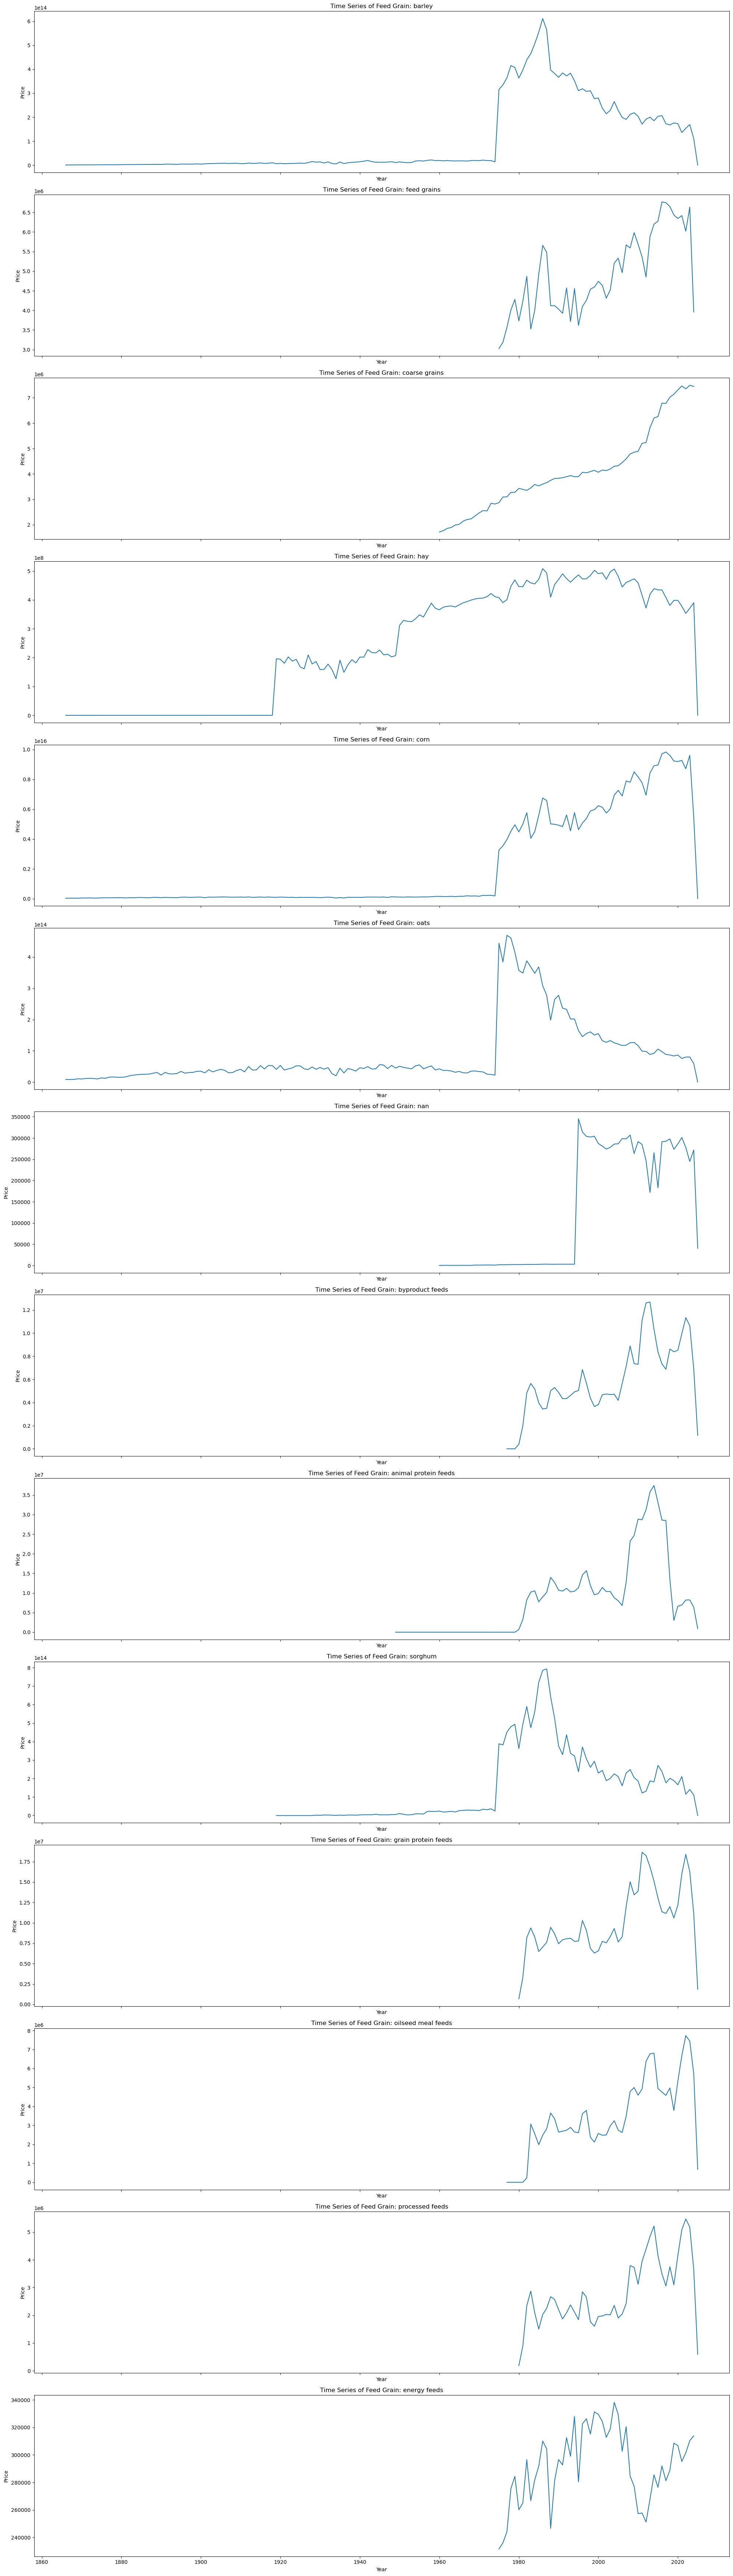

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a copy so original df remains untouched
plot_df = final_combined_df.copy()

# Ensure 'Price' is numeric
plot_df['Price'] = pd.to_numeric(plot_df['Price'], errors='coerce')

# Convert 'Year' to datetime if it isn't already
if not pd.api.types.is_datetime64_any_dtype(plot_df['Year']):
    plot_df['Year'] = pd.to_datetime(plot_df['Year'], format='%Y', errors='coerce')

# Set Year as index for resampling (only in the copy)
plot_df = plot_df.set_index('Year')

# Get unique commodities
commodities = plot_df['Commodity_Type'].dropna().unique()

# Create a figure with one subplot per commodity
n = len(commodities)
fig, axes = plt.subplots(n, 1, figsize=(20, 5 * n), sharex=True)

# If only one commodity, wrap axes in a list
if n == 1:
    axes = [axes]

# Loop through each commodity and plot its annual trend
for i, commodity in enumerate(commodities):
    commodity_df = plot_df[plot_df['Commodity_Type'] == commodity]
    yearly = commodity_df['Price'].resample('A').sum()  # Resample annually

    axes[i].plot(yearly.index.year, yearly.values)
    axes[i].set_title(f"Time Series of Feed Grain: {commodity}")
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()


In [70]:
print(final_combined_df.columns)
final_combined_df['Year'] = final_combined_df['Year'].astype(float)

Index(['Commodity_Supply_Measure', 'Commodity_ID', 'Commodity_Type',
       'Location_ID', 'Location', 'Price_Measurement_ID',
       'Price_Meaurement_Type', 'Year', 'Price_Measurement_Frequency',
       'Price_Measurement_Timeperiod', 'Price', 'Year_Range', 'Region_ID'],
      dtype='object')


In [71]:
final_combined_df['Price'] = final_combined_df['Price'].astype(float)

In [72]:
final_combined_df['Location_ID'] = final_combined_df['Location_ID'].astype(float)

In [73]:
variables = ['Commodity_ID', 'Location_ID', 'Price', 'Year', 'Region_ID']
print(final_combined_df[variables].dtypes)

Commodity_ID    float64
Location_ID     float64
Price           float64
Year            float64
Region_ID       float64
dtype: object


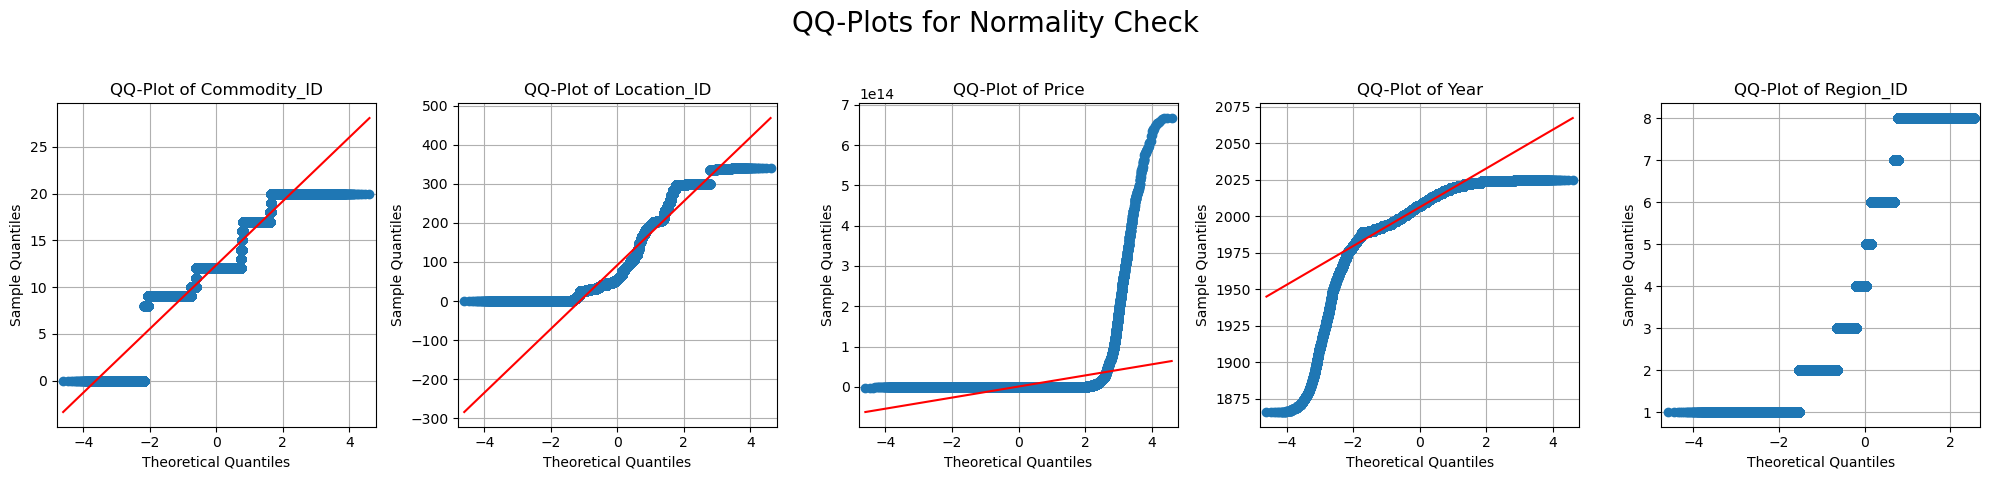

In [74]:
# Apply QQ-plot for normality check
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a figure with subplots for each variable
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('QQ-Plots for Normality Check', fontsize=20)
variables = ['Commodity_ID', 'Location_ID', 'Price', 'Year', 'Region_ID']
for i, var in enumerate(variables):
    sm.qqplot(final_combined_df[var], line='s', ax=axes[i])
    axes[i].set_title(f'QQ-Plot of {var}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')
    axes[i].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [75]:
for col in ['Commodity_ID', 'Location_ID', 'Price', 'Year', 'Region_ID']:
    # Check column is not accidentally a DataFrame
    if isinstance(final_combined_df[col], pd.Series):
        final_combined_df.loc[:, col] = pd.to_numeric(final_combined_df[col], errors='coerce')
    else:
        print(f"{col} is not a Series. Type: {type(final_combined_df[col])}")


In [76]:
final_combined_df = final_combined_df[final_combined_df['Year'] >= 1955].copy()

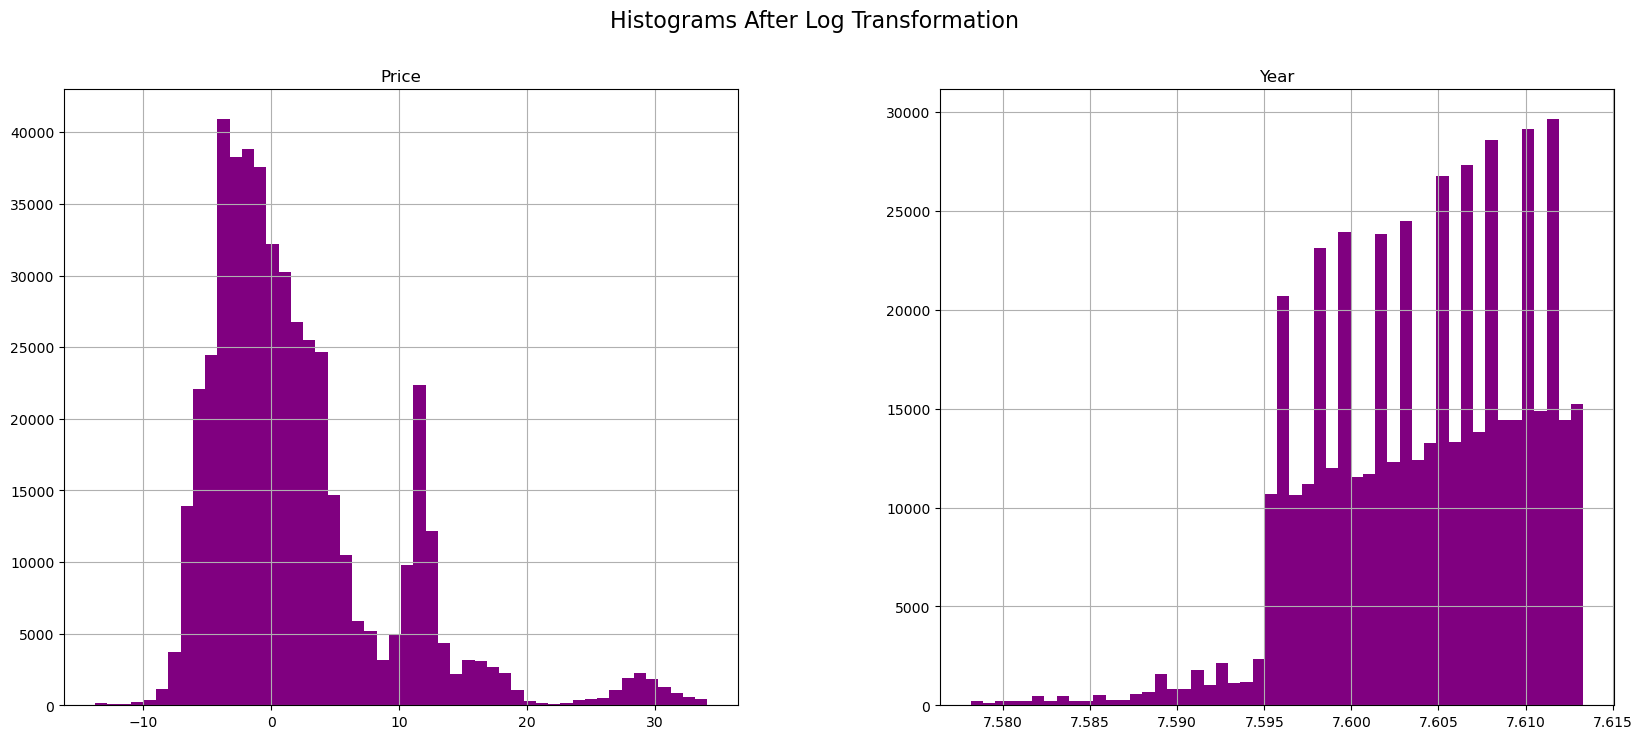

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Make a copy to preserve the original DataFrame
log_df = final_combined_df.copy()

# Replace non-positive values with NaN to avoid log issues (Price and Year)
log_df['Price'] = log_df['Price'].apply(lambda x: np.nan if x <= 0 else x)
log_df['Year'] = log_df['Year'].apply(lambda x: np.nan if x <= 0 else x)

# Apply log transformation
log_df['Price'] = np.log(log_df['Price'])
log_df['Year'] = np.log(log_df['Year'])

# Plot histograms for log-transformed numeric columns
log_df[['Price', 'Year']].hist(bins=50, figsize=(20, 8), color='purple')
plt.suptitle("Histograms After Log Transformation", fontsize=16)
plt.show()



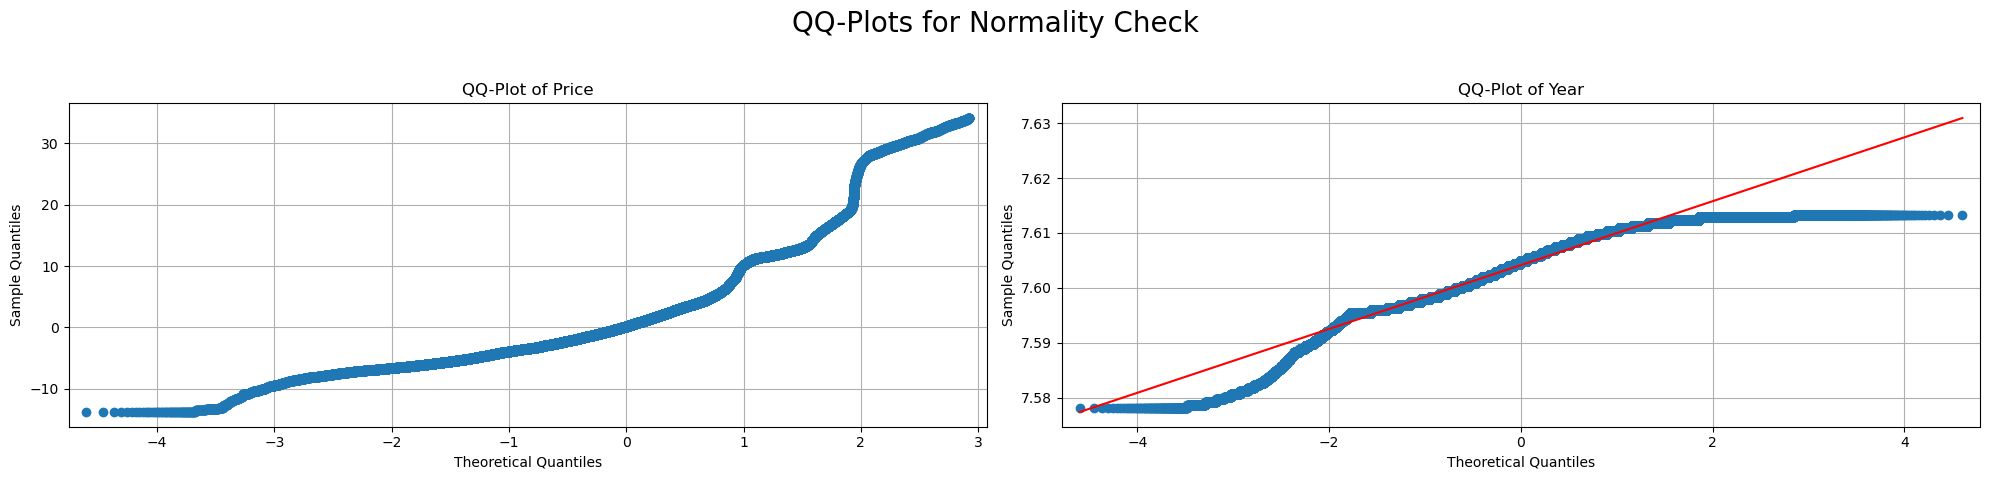

In [78]:
# Apply QQ-plot for normality check
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a figure with subplots for each variable
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('QQ-Plots for Normality Check', fontsize=20)
variables = [ 'Price','Year']
for i, var in enumerate(variables):
    sm.qqplot(log_df[var], line='s', ax=axes[i])
    axes[i].set_title(f'QQ-Plot of {var}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')
    axes[i].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [79]:
print(final_combined_df.columns)

Index(['Commodity_Supply_Measure', 'Commodity_ID', 'Commodity_Type',
       'Location_ID', 'Location', 'Price_Measurement_ID',
       'Price_Meaurement_Type', 'Year', 'Price_Measurement_Frequency',
       'Price_Measurement_Timeperiod', 'Price', 'Year_Range', 'Region_ID'],
      dtype='object')


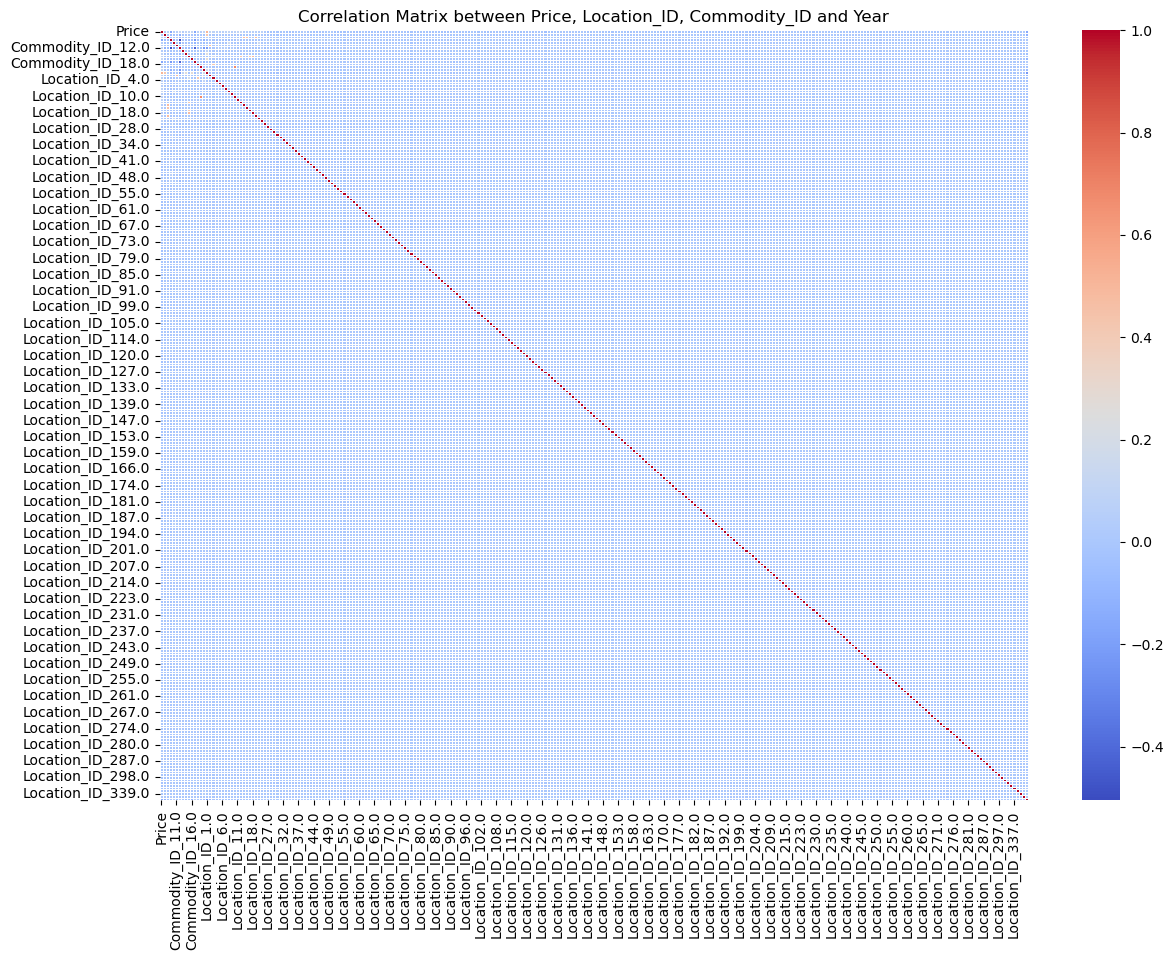

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply One-Hot Encoding to Commodity_ID, Location_ID, and Year
predict_df = pd.get_dummies(log_df, columns=['Commodity_ID', 'Location_ID'])

# Select relevant columns: 'Price' and one-hot encoded columns
correlation_columns = ['Price'] + [col for col in predict_df.columns 
                                   if col.startswith('Commodity_ID_') 
                                   or col.startswith('Location_ID_') 
                                   ] +['Year']

# Compute the correlation matrix
correlation_matrix = predict_df[correlation_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix between Price, Location_ID, Commodity_ID and Year")
plt.show()

In [81]:
print(predict_df.columns)
predict_df_columns = predict_df.select_dtypes(include=['float', 'float32', 'float64'])
#predict_df_columns.dropna()

Index(['Commodity_Supply_Measure', 'Commodity_Type', 'Location',
       'Price_Measurement_ID', 'Price_Meaurement_Type', 'Year',
       'Price_Measurement_Frequency', 'Price_Measurement_Timeperiod', 'Price',
       'Year_Range',
       ...
       'Location_ID_291.0', 'Location_ID_297.0', 'Location_ID_298.0',
       'Location_ID_299.0', 'Location_ID_300.0', 'Location_ID_336.0',
       'Location_ID_337.0', 'Location_ID_338.0', 'Location_ID_339.0',
       'Location_ID_340.0'],
      dtype='object', length=294)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

predict_df_price = predict_df.dropna(subset=['Price'])
# Drop specified columns from predict_df
columns_to_drop = ['Commodity_Supply_Measure', 'Commodity_Type', 'Location',
                   'Price_Meaurement_Type', 'Price_Measurement_Frequency',
                   'Price_Measurement_Timeperiod', 'Price', 'Year_Range', 'Region_ID']


predict_df_cleaned = predict_df_price.drop(columns=columns_to_drop)

# Drop rows where the target 'Price' is missing



# Feature columns (all remaining columns except 'Price')
X = predict_df_cleaned

# Target column (Price)
y = predict_df_price['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Get coefficients
coefficients = lin_reg.coef_
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coef_df)

# Predict and evaluate
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")






                  Feature   Coefficient
0    Price_Measurement_ID -6.967711e-01
1                    Year  1.109305e-01
2        Commodity_ID_0.0 -7.897496e+10
3        Commodity_ID_8.0 -4.099263e+10
4        Commodity_ID_9.0 -2.588270e+11
..                    ...           ...
280     Location_ID_336.0  2.559010e+11
281     Location_ID_337.0  2.331880e+11
282     Location_ID_338.0  9.305013e+10
283     Location_ID_339.0  6.734737e+10
284     Location_ID_340.0  1.048533e+11

[285 rows x 2 columns]
Mean Squared Error: 21.837705668673156
R-squared: 0.5779547284484698


In [83]:
commodity_columns = [col for col in predict_df.columns if col.startswith('Commodity_ID_')]

# Count rows where all one-hot encoded Commodity_ID columns are 0
missing_commodity_count = (predict_df[commodity_columns].sum(axis=1) == 0).sum()

print(f"Number of rows with missing Commodity_ID: {missing_commodity_count}")

Number of rows with missing Commodity_ID: 0


In [84]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Apply One-Hot Encoding to categorical variables
predict_df = pd.get_dummies(log_df, columns=['Commodity_ID', 'Location_ID'])

# Drop rows where 'Commodity_ID' is NaN
commodity_columns = [col for col in predict_df.columns if 'Commodity_ID' in col]
predict_df_commodity = predict_df.dropna(subset=commodity_columns)

# Drop specified columns (only if they exist)
columns_to_drop = ['Commodity_Supply_Measure', 'Commodity_Type', 'Location',
                   'Price_Meaurement_Type', 'Price_Measurement_Frequency',
                   'Price_Measurement_Timeperiod', 'Year_Range', 'Region_ID']

predict_df_commodity = predict_df_commodity.drop(columns=[col for col in columns_to_drop if col in predict_df_commodity.columns])

# Prepare features (X) and target (y)
X = predict_df_commodity.dropna(axis=0)  # Drop rows with any NaN in features
y = X['Commodity_ID_1'] if 'Commodity_ID_1' in X.columns else X.iloc[:, list(X.columns).index(commodity_columns[0])]  # Adjust if needed
X = X.drop(columns=commodity_columns)  # Drop target columns from features

# Drop target's NaNs and make sure X and y are aligned
df_model = pd.concat([X, y], axis=1).dropna()
X_clean = df_model.drop(columns=y.name)
y_clean = df_model[y.name]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Get coefficients
coefficients = lin_reg.coef_
coef_df = pd.DataFrame({'Feature': X_clean.columns, 'Coefficient': coefficients})
print(coef_df)

# Predict and evaluate
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


                  Feature   Coefficient
0    Price_Measurement_ID  7.185280e-02
1                    Year -1.839071e-03
2                   Price -2.535452e-02
3         Location_ID_1.0 -5.241443e+08
4         Location_ID_2.0 -1.428064e+08
..                    ...           ...
267     Location_ID_336.0 -6.823737e+07
268     Location_ID_337.0 -6.218082e+07
269     Location_ID_338.0 -2.481231e+07
270     Location_ID_339.0 -1.795853e+07
271     Location_ID_340.0 -2.795969e+07

[272 rows x 2 columns]
Mean Squared Error: 0.008245510223952276
R-squared: 0.46722031649086626


In [85]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Apply One-Hot Encoding to categorical variables
predict_df = pd.get_dummies(log_df, columns=['Commodity_ID', 'Location_ID'])

# Drop rows where 'Commodity_ID' is NaN
commodity_columns = [col for col in predict_df.columns if 'Commodity_ID' in col]
predict_df_commodity = predict_df.dropna(subset=commodity_columns)

# Drop specified columns (only if they exist)
columns_to_drop = ['Commodity_Supply_Measure', 'Commodity_Type', 'Location',
                   'Price_Meaurement_Type', 'Price_Measurement_Frequency',
                   'Price_Measurement_Timeperiod', 'Year_Range', 'Region_ID','Price']

predict_df_commodity = predict_df_commodity.drop(columns=[col for col in columns_to_drop if col in predict_df_commodity.columns])

# Prepare features (X) and target (y)
X = predict_df_commodity.dropna(axis=0)  # Drop rows with any NaN in features
y = X['Commodity_ID_1'] if 'Commodity_ID_1' in X.columns else X.iloc[:, list(X.columns).index(commodity_columns[0])]  # Adjust if needed
X = X.drop(columns=commodity_columns)  # Drop target columns from features

# Drop target's NaNs and make sure X and y are aligned
df_model = pd.concat([X, y], axis=1).dropna()
X_clean = df_model.drop(columns=y.name)
y_clean = df_model[y.name]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Get coefficients
coefficients = lin_reg.coef_
coef_df = pd.DataFrame({'Feature': X_clean.columns, 'Coefficient': coefficients})
print(coef_df)

# Predict and evaluate
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

                  Feature   Coefficient
0    Price_Measurement_ID  7.770526e-02
1                    Year -2.246027e-03
2         Location_ID_1.0  5.202200e+08
3         Location_ID_2.0  1.391913e+08
4         Location_ID_3.0  1.062721e+08
..                    ...           ...
266     Location_ID_336.0  6.698310e+07
267     Location_ID_337.0  6.205214e+07
268     Location_ID_338.0  2.291554e+07
269     Location_ID_339.0  1.591235e+07
270     Location_ID_340.0  2.872495e+07

[271 rows x 2 columns]
Mean Squared Error: 0.008179581358759664
R-squared: 0.4531334156681377


In [86]:
import matplotlib.pyplot as plt

# Predict the values
y_pred = gbr.predict(X_test_scaled)

# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot Actual Values
axs[0].scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, edgecolors='w', s=100)
axs[0].set_title('Actual Values (Price)')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Actual Price')
axs[0].grid(True)

# Plot Predicted Values
axs[1].scatter(range(len(y_pred)), y_pred, color='green', alpha=0.6, edgecolors='w', s=100)
axs[1].set_title('Predicted Values (Price)')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Predicted Price')
axs[1].grid(True)

# Set same scale for both plots
y_min = min(y_test.min(), y_pred.min())
y_max = max(y_test.max(), y_pred.max())
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'gbr' is not defined

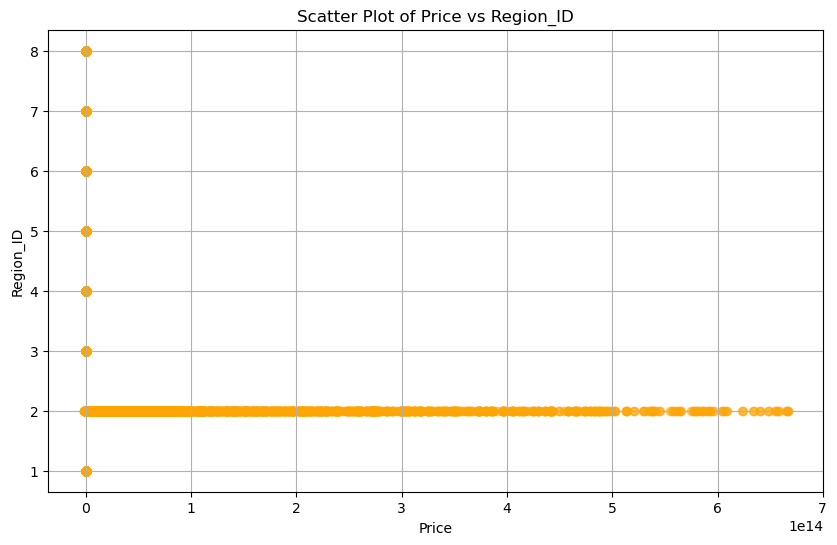

In [87]:
# Create scatter plot for Price vs Region_ID (as 'gdp' column is missing)
plt.figure(figsize=(10, 6))
plt.scatter(final_combined_df['Price'], final_combined_df['Region_ID'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Price vs Region_ID')
plt.xlabel('Price')
plt.ylabel('Region_ID')
plt.grid(True)
plt.show()

In [96]:
final_combined_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\data3.csv")
print(final_combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524368 entries, 0 to 524367
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SC_Group_ID                524368 non-null  int64  
 1   SC_Group_Desc              524368 non-null  object 
 2   SC_GroupCommod_ID          516928 non-null  float64
 3   SC_GroupCommod_Desc        516928 non-null  object 
 4   SC_Geography_ID            524368 non-null  int64  
 5   SortOrder                  524368 non-null  float64
 6   SC_GeographyIndented_Desc  524368 non-null  object 
 7   SC_Commodity_ID            524368 non-null  int64  
 8   SC_Commodity_Desc          524368 non-null  object 
 9   SC_Attribute_ID            524368 non-null  int64  
 10  SC_Attribute_Desc          524368 non-null  object 
 11  SC_Unit_ID                 524368 non-null  int64  
 12  SC_Unit_Desc               524368 non-null  object 
 13  Year_ID                    52

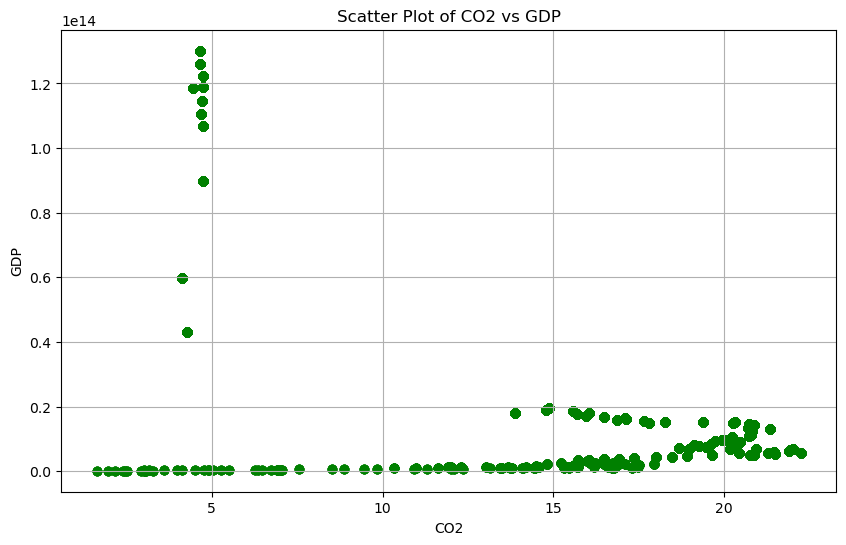

In [97]:
# Craete scatter plot for CO2 vs GDP
plt.figure(figsize=(10, 6))
plt.scatter(final_combined_df['co2_per_capita'], final_combined_df['gdp'], alpha=0.5, color='green')
plt.title('Scatter Plot of CO2 vs GDP')
plt.xlabel('CO2')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

In [107]:
df_with_price = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\data_corrected_labels.csv")

final_combined_df = final_combined_df.drop_duplicates()
df_with_price = df_with_price.drop_duplicates()

# Merge the datasets on common columns (e.g., 'Year' and 'Location_ID')
final_merged_df = pd.concat([final_combined_df, df_with_price], ignore_index=True)
# Display information about the merged DataFrame
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957128 entries, 0 to 957127
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SC_Group_ID                   524368 non-null  float64
 1   SC_Group_Desc                 524368 non-null  object 
 2   SC_GroupCommod_ID             516928 non-null  float64
 3   SC_GroupCommod_Desc           516928 non-null  object 
 4   SC_Geography_ID               524368 non-null  float64
 5   SortOrder                     524368 non-null  float64
 6   SC_GeographyIndented_Desc     524368 non-null  object 
 7   SC_Commodity_ID               524368 non-null  float64
 8   SC_Commodity_Desc             524368 non-null  object 
 9   SC_Attribute_ID               524368 non-null  float64
 10  SC_Attribute_Desc             524368 non-null  object 
 11  SC_Unit_ID                    524368 non-null  float64
 12  SC_Unit_Desc                  524368 non-nul

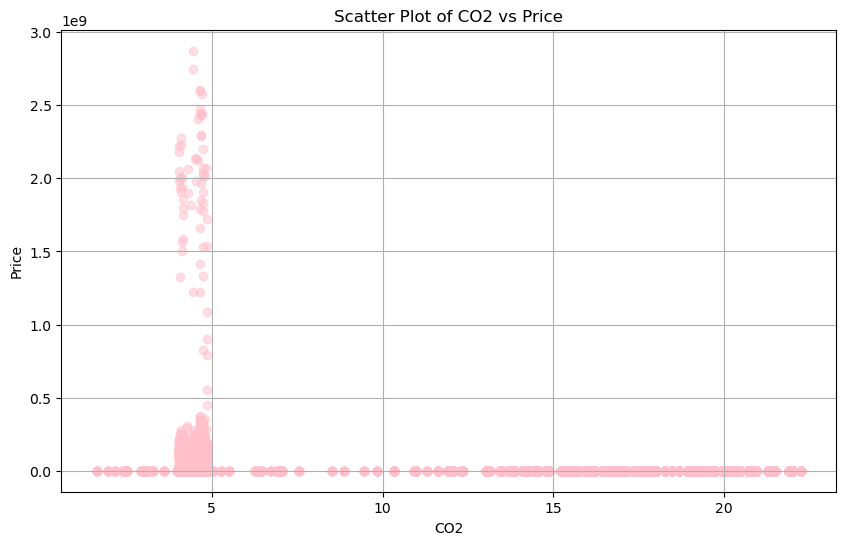

In [108]:
#Create Visualization for CO2 vs Price
plt.figure(figsize=(10, 6))
plt.scatter(final_merged_df['co2_per_capita'], final_merged_df['Price'], alpha=0.5, color='pink')
plt.title('Scatter Plot of CO2 vs Price')
plt.xlabel('CO2')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [114]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957128 entries, 0 to 957127
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SC_Group_ID                   524368 non-null  float64
 1   SC_Group_Desc                 524368 non-null  object 
 2   SC_GroupCommod_ID             516928 non-null  float64
 3   SC_GroupCommod_Desc           516928 non-null  object 
 4   SC_Geography_ID               524368 non-null  float64
 5   SortOrder                     524368 non-null  float64
 6   SC_GeographyIndented_Desc     524368 non-null  object 
 7   SC_Commodity_ID               524368 non-null  float64
 8   SC_Commodity_Desc             524368 non-null  object 
 9   SC_Attribute_ID               524368 non-null  float64
 10  SC_Attribute_Desc             524368 non-null  object 
 11  SC_Unit_ID                    524368 non-null  float64
 12  SC_Unit_Desc                  524368 non-nul

In [116]:
# Group by Location_ID, Time_Range, and Commodity_Type, then count
commodity_counts = (
    final_merged_df
    .groupby(['Location_ID', 'Time_Range', 'Commodity_Type'])
    .size()
    .reset_index(name='count')
)

In [117]:
commodity_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location_ID     2226 non-null   float64
 1   Time_Range      2226 non-null   int64  
 2   Commodity_Type  2226 non-null   object 
 3   count           2226 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 69.7+ KB


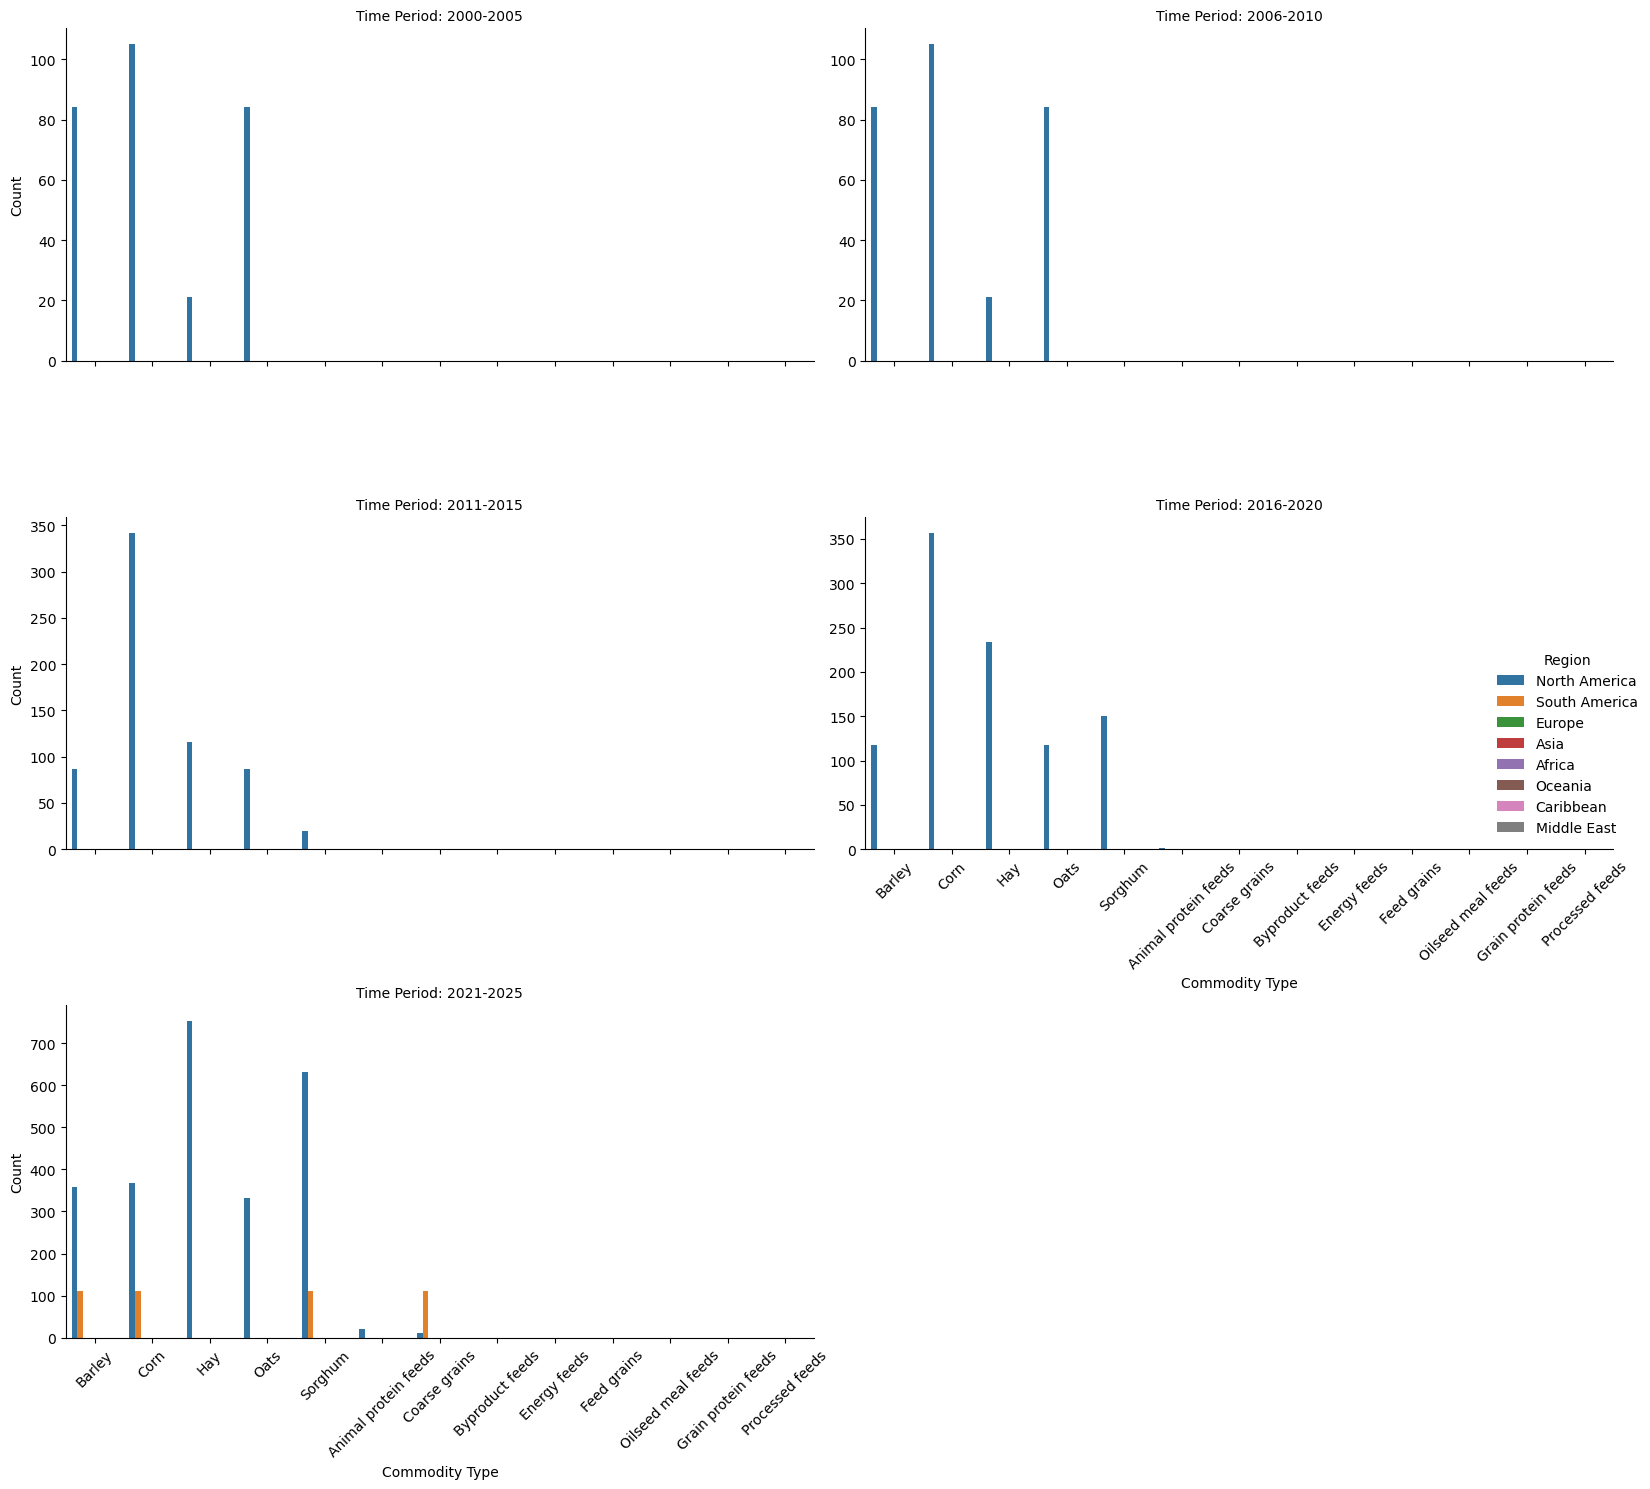

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a mapping for Location_ID to Region
location_id_to_region = {
    1: 'North America',
    2: 'South America',
    3: 'Europe',
    4: 'Asia',
    5: 'Africa',
    6: 'Oceania',
    7: 'Caribbean',
    8: 'Middle East'
    # Add more mappings as needed
}

# Define a mapping for Time_Range to readable labels (if not already defined)
time_range_labels = {
    1: '2000-2005',
    2: '2006-2010',
    3: '2011-2015',
    4: '2016-2020',
    5: '2021-2025'
    # Add more mappings as needed
}

# Map Location_ID and Time_Range to readable labels
commodity_counts['Region'] = commodity_counts['Location_ID'].map(location_id_to_region)
commodity_counts['Time_Period'] = commodity_counts['Time_Range'].map(time_range_labels)

# Set the color palette
palette = sns.color_palette('tab10', n_colors=commodity_counts['Region'].nunique())

# Create a faceted bar plot for each time period
g = sns.catplot(
    data=commodity_counts,
    x='Commodity_Type',
    y='count',
    hue='Region',
    col='Time_Period',
    col_wrap=2,  # Adjust number of columns in the grid
    kind='bar',
    palette=palette,
    height=5,
    aspect=1.5,
    sharey=False
)

# Customize plot aesthetics
g.set_titles(col_template="Time Period: {col_name}")
g.set_axis_labels("Commodity Type", "Count")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

g._legend.set_title('Region')
plt.tight_layout()
plt.show()

g.savefig(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\feedcrop_count.png", bbox_inches='tight', dpi=300)


In [121]:
final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\data_world.csv", index=False)

# Define final_combined_df_gdp as a copy of final_combined_df
final_combined_df_gdp = final_combined_df.copy()

# Drop rows with missing values in final_combined_df_gdp
final_combined_df_gdp.dropna(inplace=True)

# Save the cleaned DataFrame to a CSV file
final_combined_df_gdp.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\data_gdp.csv", index=False)

In [122]:
print(us_df.head)
print(us_df['Location'].unique())

<bound method NDFrame.head of        Commodity_Supply_Measure  Commodity_ID Commodity_Type  Location_ID  \
1                Supply and use           9.0         barley          1.0   
2                Supply and use           9.0         barley          1.0   
3                Supply and use           9.0         barley          1.0   
4                Supply and use           9.0         barley          1.0   
5                Supply and use           9.0         barley          1.0   
...                         ...           ...            ...          ...   
523433           Supply and use          12.0           corn          1.0   
523434           Supply and use          12.0           corn          1.0   
523435           Supply and use          12.0           corn          1.0   
523436           Supply and use          12.0           corn          1.0   
523437           Supply and use          12.0           corn          1.0   

             Location  Price_Measurement_ID P

In [123]:
# Define values to remove
locations_to_remove = [
    '  World less U.S.',
    '          Former Ussr, Begins 1/1989 & Ends 1/1993',
    '          Russian Federation, Begins 2/1992'
]

# Filter them out
us_df = us_df[~us_df['Location'].isin(locations_to_remove)]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16768\2743675885.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")


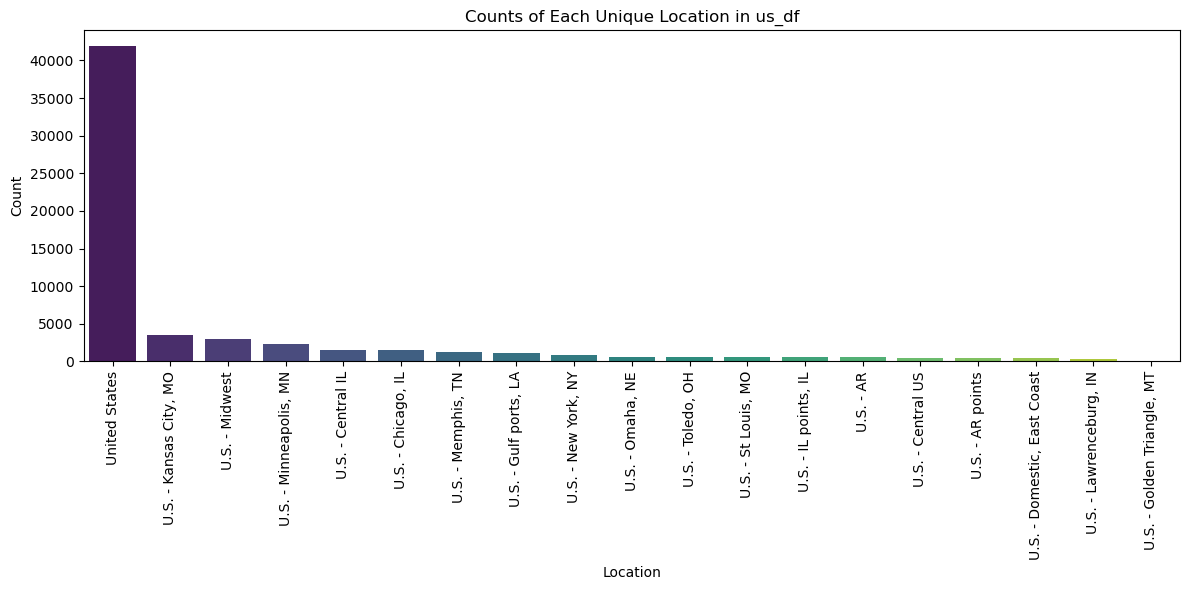

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each unique Location
location_counts = us_df['Location'].value_counts()

# Plot the counts
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Counts of Each Unique Location in us_df")
plt.tight_layout()
plt.show()


In [125]:
us_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\data_us.csv", index=False)

In [126]:
# Filter rows where Price_Measurement_ID == 12
filtered_df = us_df[us_df['Price_Measurement_ID'] == 12]

# Group by Location (assuming column is named 'Location') and calculate the average Price
average_price_by_location = filtered_df.groupby('Location')['Price'].mean().reset_index()

# Optionally rename for clarity
average_price_by_location.columns = ['Location', 'Average_Price']


In [127]:
print(average_price_by_location)

                       Location  Average_Price
0                     U.S. - AR   95503.376643
1              U.S. - AR points  363342.095260
2             U.S. - Central IL  195214.494395
3             U.S. - Central US  262707.731466
4            U.S. - Chicago, IL  266900.457123
5   U.S. - Domestic, East Coast  748709.597162
6    U.S. - Golden Triangle, MT  283068.805781
7         U.S. - Gulf ports, LA  139883.964732
8          U.S. - IL points, IL  113118.422251
9        U.S. - Kansas City, MO  136713.171359
10      U.S. - Lawrenceburg, IN  132577.021599
11           U.S. - Memphis, TN  179041.400105
12               U.S. - Midwest  393044.612626
13       U.S. - Minneapolis, MN  119015.742827
14          U.S. - New York, NY  422813.094874
15             U.S. - Omaha, NE  126613.391541
16          U.S. - St Louis, MO  133543.166386
17            U.S. - Toledo, OH  128876.115820
18                United States  101022.515644


In [128]:
# Count occurrences of each Commodity_ID per Location
commodity_counts = us_df.groupby(['Location', 'Commodity_ID']).size().reset_index(name='Count')

# For each location, get the Commodity_ID with the highest count
top_commodity_per_location = commodity_counts.sort_values('Count', ascending=False).drop_duplicates('Location')

# Optional: Sort by Location for readability
top_commodity_per_location = top_commodity_per_location.sort_values('Location')

print(top_commodity_per_location)

                       Location  Commodity_ID  Count
0                     U.S. - AR          10.0    524
1              U.S. - AR points           8.0    493
2             U.S. - Central IL          12.0    643
5             U.S. - Central US           8.0    505
6            U.S. - Chicago, IL          12.0   1482
7   U.S. - Domestic, East Coast           8.0    431
8    U.S. - Golden Triangle, MT           9.0    107
9         U.S. - Gulf ports, LA          12.0    640
11         U.S. - IL points, IL          15.0    563
12       U.S. - Kansas City, MO          10.0   1656
15      U.S. - Lawrenceburg, IN          15.0    377
16           U.S. - Memphis, TN          12.0    640
18               U.S. - Midwest          12.0   1814
20       U.S. - Minneapolis, MN           9.0   1015
23          U.S. - New York, NY          12.0    839
24             U.S. - Omaha, NE          12.0    643
25          U.S. - St Louis, MO          12.0    637
26            U.S. - Toledo, OH          12.0 

In [129]:
# 1. Get average Price by Year_Range
avg_price = us_df.groupby('Year_Range')['Price'].mean().reset_index()
avg_price.columns = ['Year_Range', 'Average_Price']

# 2. Get most common Commodity_ID by Year_Range
most_common_commodity = (
    us_df.groupby(['Year_Range', 'Commodity_ID'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Year_Range', 'Count'], ascending=[True, False])
    .drop_duplicates('Year_Range')
)

# 3. Merge both results
result = pd.merge(avg_price, most_common_commodity[['Year_Range', 'Commodity_ID']], on='Year_Range')


In [130]:
print(result)

   Year_Range  Average_Price  Commodity_ID
0           1   5.038945e+12          12.0
1           2   9.163338e+12          12.0
2           3   4.688584e+12          12.0
3           4   3.152251e+12          12.0
4           5   1.411161e+12          16.0
5           6   6.206887e+12          12.0
6           7   5.927164e+12          12.0
7           8   7.953502e+12          12.0


In [131]:
# Count occurrences of each Price_Measurement_Type per Location
counts = (
    us_df.groupby(['Location', 'Price_Meaurement_Type'])
    .size()
    .reset_index(name='Count')
)

# Sort by Location and descending Count
sorted_counts = counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Select the most common Price_Measurement_Type for each Location
most_common_pm_type = sorted_counts.drop_duplicates(subset=['Location'])

# Sort final result for readability
most_common_pm_type = most_common_pm_type.sort_values('Location').reset_index(drop=True)

# Print the result
print(most_common_pm_type)



                       Location Price_Meaurement_Type  Count
0                     U.S. - AR       Dollars per ton    524
1              U.S. - AR points       Dollars per ton    493
2             U.S. - Central IL       Dollars per ton    865
3             U.S. - Central US       Dollars per ton    505
4            U.S. - Chicago, IL       Dollars per cwt    839
5   U.S. - Domestic, East Coast       Dollars per ton    431
6    U.S. - Golden Triangle, MT    Dollars per bushel    107
7         U.S. - Gulf ports, LA    Dollars per bushel    640
8          U.S. - IL points, IL       Dollars per ton    563
9        U.S. - Kansas City, MO       Dollars per ton   1656
10      U.S. - Lawrenceburg, IN       Dollars per ton    377
11           U.S. - Memphis, TN    Dollars per bushel    640
12               U.S. - Midwest       Cents per pound   1514
13       U.S. - Minneapolis, MN    Dollars per bushel   2249
14          U.S. - New York, NY       Dollars per cwt    839
15             U.S. - Om

'Price_Measurement_ID' column is missing in final_combined_df. Creating it with default values.


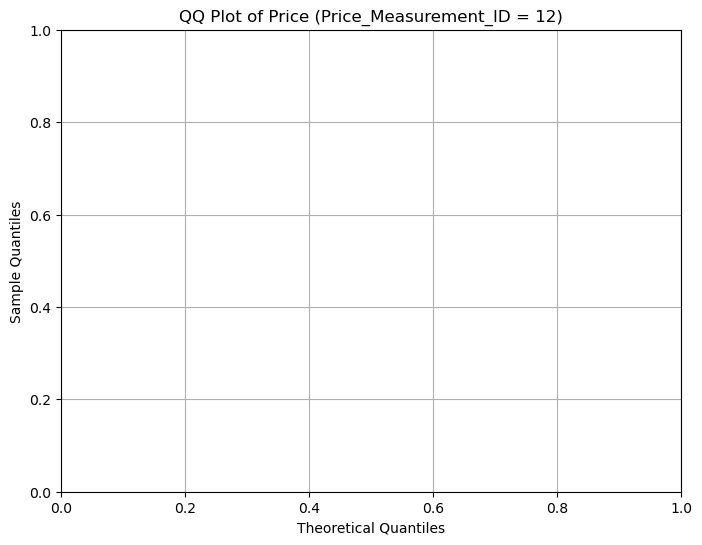

In [134]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Check if 'Price_Measurement_ID' exists in the DataFrame
if 'Price_Measurement_ID' in final_combined_df.columns:
	# Filter DataFrame for rows with Price_Measurement_ID == 12
	price_data = final_combined_df[final_combined_df['Price_Measurement_ID'] == 12]['Price'].dropna()
else:
	# Handle the missing column by creating it with default values (if appropriate)
	print("'Price_Measurement_ID' column is missing in final_combined_df. Creating it with default values.")
	final_combined_df['Price_Measurement_ID'] = None
	price_data = pd.Series(dtype=float)  # Empty Series as no data matches the filter

# Create QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(price_data, dist="norm", plot=plt)
plt.title("QQ Plot of Price (Price_Measurement_ID = 12)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()


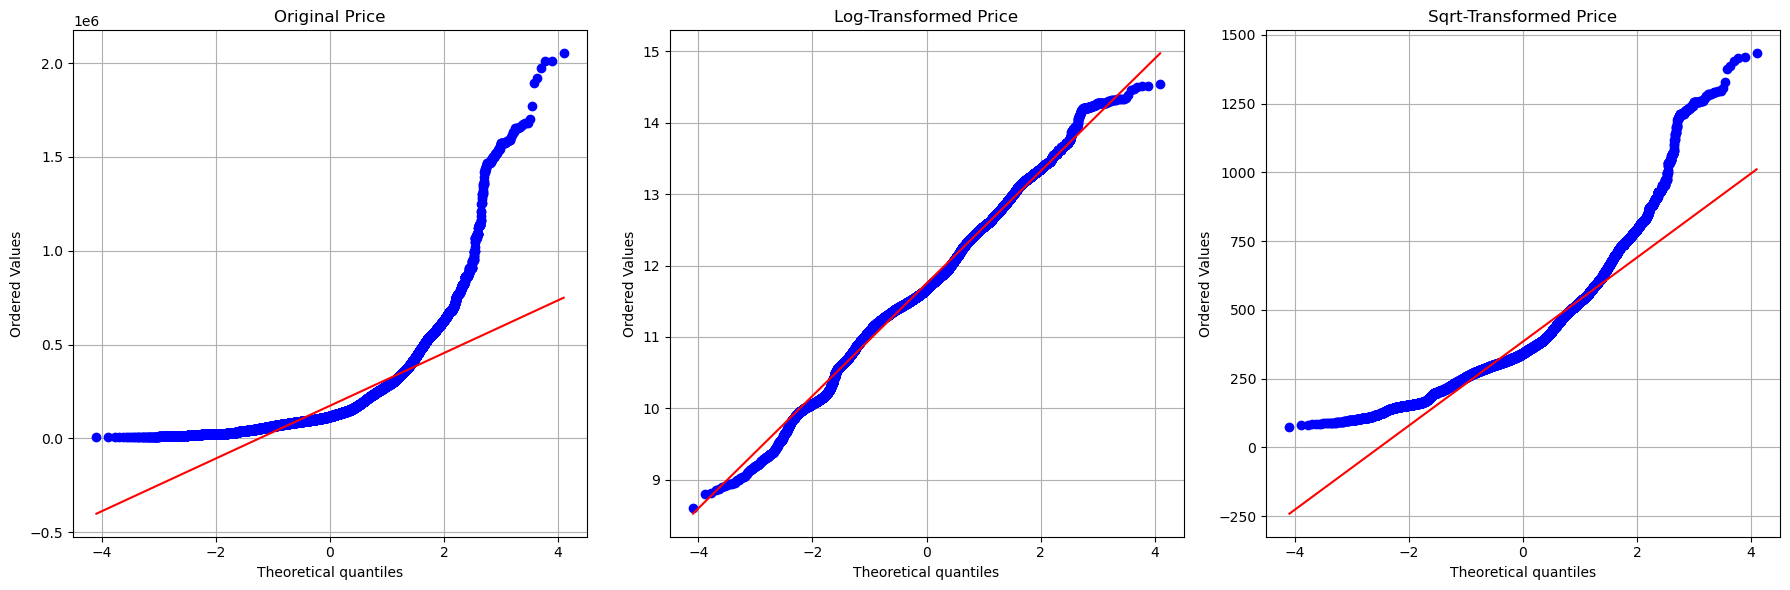

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Filter the data for Price_Measurement_ID == 12
price_data = us_df[us_df['Price_Measurement_ID'] == 12]['Price'].dropna()

# Apply transformations
log_price = np.log(price_data[price_data > 0])      # Ensure positive values for log
sqrt_price = np.sqrt(price_data)

# Create QQ plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original data
stats.probplot(price_data, dist="norm", plot=axes[0])
axes[0].set_title("Original Price")
axes[0].grid(True)

# Log-transformed
stats.probplot(log_price, dist="norm", plot=axes[1])
axes[1].set_title("Log-Transformed Price")
axes[1].grid(True)

# Square root-transformed
stats.probplot(sqrt_price, dist="norm", plot=axes[2])
axes[2].set_title("Sqrt-Transformed Price")
axes[2].grid(True)

plt.tight_layout()
plt.show()


Principal Component 1: 0.4067 variance explained
Principal Component 2: 0.3904 variance explained
Principal Component 3: 0.0900 variance explained
Principal Component 4: 0.0214 variance explained
Principal Component 5: 0.0169 variance explained


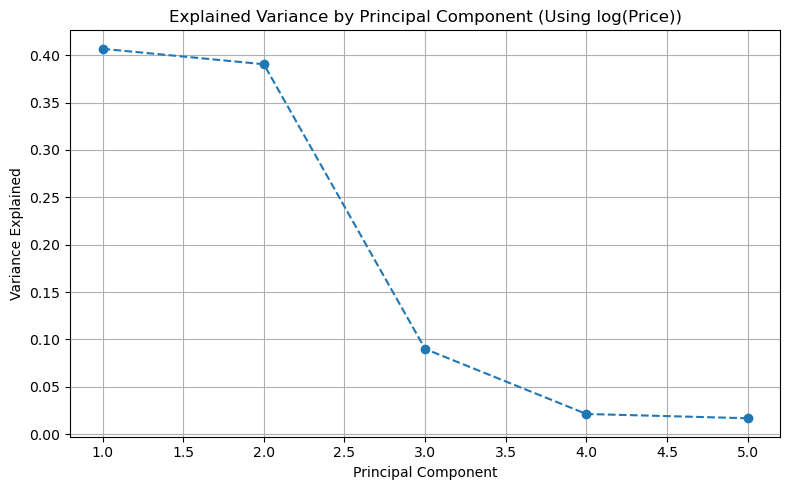

In [136]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter rows where Price > 0 and drop NaNs
pca_df = us_df[['Commodity_ID', 'Location', 'Year', 'Price']].dropna()
pca_df = pca_df[pca_df['Price'] > 0]

# Create log-transformed Price column
pca_df['log_price'] = np.log(pca_df['Price'])

# Separate features and target
X = pca_df[['Commodity_ID', 'Location', 'Year']]
y = pca_df['log_price']  # using log-transformed price

# Define column types
numeric_features = ['Commodity_ID', 'Year']
categorical_features = ['Location']

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create pipeline with preprocessing and PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5))  # You can change this if needed
])

# Fit PCA
X_pca = pipeline.fit_transform(X)

# Access explained variance
pca_model = pipeline.named_steps['pca']
explained_variance = pca_model.explained_variance_ratio_

# Display explained variance
for i, var in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {var:.4f} variance explained")

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Component (Using log(Price))")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.tight_layout()
plt.show()


In [138]:
import numpy as np

# Get feature names from preprocessor
# This handles both numeric and one-hot encoded categorical features
num_features = numeric_features
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([num_features, cat_features])

# Get PCA component loadings (aka eigenvectors)
components = pca_model.components_

# Create a DataFrame of loadings for PC1 and PC2
pc1_pc2_loadings = pd.DataFrame(components[:2], columns=all_feature_names, index=['PC1', 'PC2']).T

# Sort by absolute value to show most important features
pc1_sorted = pc1_pc2_loadings['PC1'].abs().sort_values(ascending=False)
pc2_sorted = pc1_pc2_loadings['PC2'].abs().sort_values(ascending=False)
# Display top contributing features for PC1 and PC2
print("\n🔹 Top contributors to Principal Component 1:")
print(pc1_pc2_loadings.loc[pc1_sorted.index[:10]])

print("\n🔹 Top contributors to Principal Component 2:")
print(pc1_pc2_loadings.loc[pc2_sorted.index[:10]])
#Commodity_ID and Year were more important than exact US location to determine Price. 


🔹 Top contributors to Principal Component 1:
                                      PC1       PC2
Year                             0.773851  0.621563
Commodity_ID                    -0.630529  0.773716
Location_United States          -0.056023 -0.114996
Location_U.S. - Kansas City, MO  0.009815  0.018559
Location_U.S. - Midwest          0.009713  0.024032
Location_U.S. - Chicago, IL      0.008019  0.007930
Location_U.S. - New York, NY     0.005979  0.005685
Location_U.S. - AR points        0.005934 -0.002106
Location_U.S. - Central US       0.005321 -0.002793
Location_U.S. - Gulf ports, LA  -0.005290  0.012450

🔹 Top contributors to Principal Component 2:
                                      PC1       PC2
Commodity_ID                    -0.630529  0.773716
Year                             0.773851  0.621563
Location_United States          -0.056023 -0.114996
Location_U.S. - Midwest          0.009713  0.024032
Location_U.S. - Kansas City, MO  0.009815  0.018559
Location_U.S. - Central 

In [139]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Filter and clean the data
filtered_df = us_df[['Commodity_ID', 'Location', 'Year', 'Price']].dropna()
filtered_df = filtered_df[filtered_df['Price'] > 0]
filtered_df['log_price'] = np.log(filtered_df['Price'])

# Step 2: Define features and target
X = filtered_df[['Commodity_ID', 'Location', 'Year']]
y = filtered_df['log_price']

# Step 3: Preprocessing pipeline with PCA
numeric_features = ['Commodity_ID', 'Year']
categorical_features = ['Location']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5))
])

# Step 4: Fit the pipeline and transform data
X_pca = pca_pipeline.fit_transform(X)

# Step 5: Use only first 3 PCA components
X_pca_selected = X_pca[:, :3]

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42)

# Step 7: Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 8: Predict
y_pred = knn.predict(X_test)

# Step 9: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Squared Error (log scale): {mse:.4f}")
print(f"✅ R² Score (log scale): {r2:.4f}")


✅ Mean Squared Error (log scale): 36.5810
✅ R² Score (log scale): 0.4840


In [140]:
def predict_price(commodity_id, year, location):
    # Create a DataFrame for the single input
    input_df = pd.DataFrame({
        'Commodity_ID': [commodity_id],
        'Year': [year],
        'Location': [location]
    })

    # Apply the existing PCA pipeline (preprocessing + PCA)
    input_pca = pca_pipeline.transform(input_df)

    # Predict log(price)
    predicted_log_price = knn.predict(input_pca)

    # Convert log(price) to actual price
    predicted_price = np.exp(predicted_log_price[0])

    print(f"📈 Predicted Price: ${predicted_price:,.2f} per 1000 metric tons")


In [142]:
# predict_price(commodity_id=19, year=2000, location='U.S. - Midwest')

In [143]:
# Display unique Commodity_ID and their corresponding Commodity_Type
commodity_mapping = us_df[['Commodity_ID', 'Commodity_Type']].drop_duplicates().sort_values('Commodity_ID')
print(commodity_mapping.to_string(index=False))


 Commodity_ID       Commodity_Type
          0.0                  nan
          8.0 animal protein feeds
          9.0               barley
         10.0      byproduct feeds
         11.0        coarse grains
         12.0                 corn
         13.0         energy feeds
         14.0          feed grains
         15.0  grain protein feeds
         16.0                  hay
         17.0                 oats
         18.0   oilseed meal feeds
         19.0      processed feeds
         20.0              sorghum


In [144]:
# Display the top 5 most common commodity types
top_commodity_types = us_df['Commodity_Type'].value_counts().head(6)
print(top_commodity_types)


Commodity_Type
corn       16777
sorghum     7610
nan         7440
barley      7337
oats        5616
hay         3847
Name: count, dtype: int64


RMSE: 80937303.12828471, R-squared: 0.012069879712911291


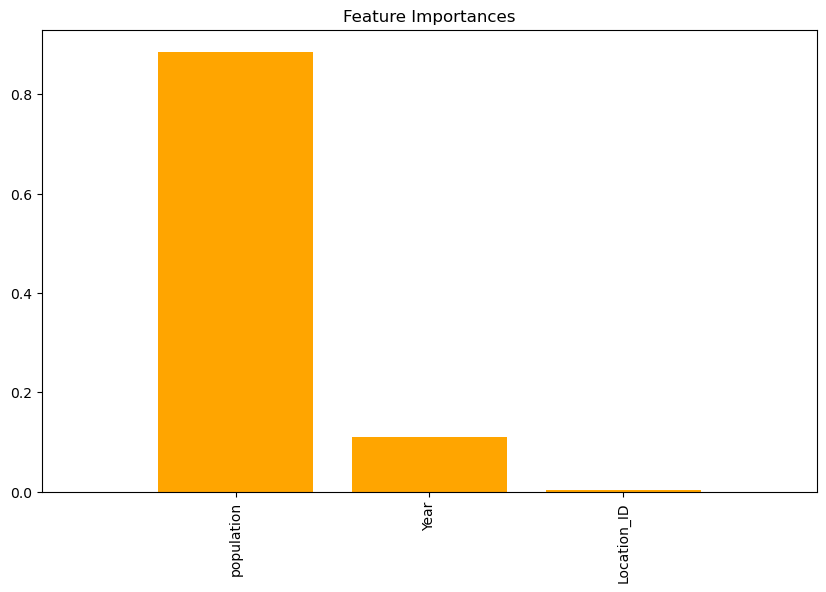

In [146]:
# Research Question #2 What are the key factors that influence price fluctuations?
# Use Random Forest to identify feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = final_merged_df[['Location_ID', 'Year', 'population']].dropna()
target = final_merged_df.loc[features.index, 'Price']

# Drop rows where target contains NaN
valid_indices = target.dropna().index
features = features.loc[valid_indices]
target = target.loc[valid_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R-squared: {r2}")

# Plot random forest feature importances
importances = rf_model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center", color="orange")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()


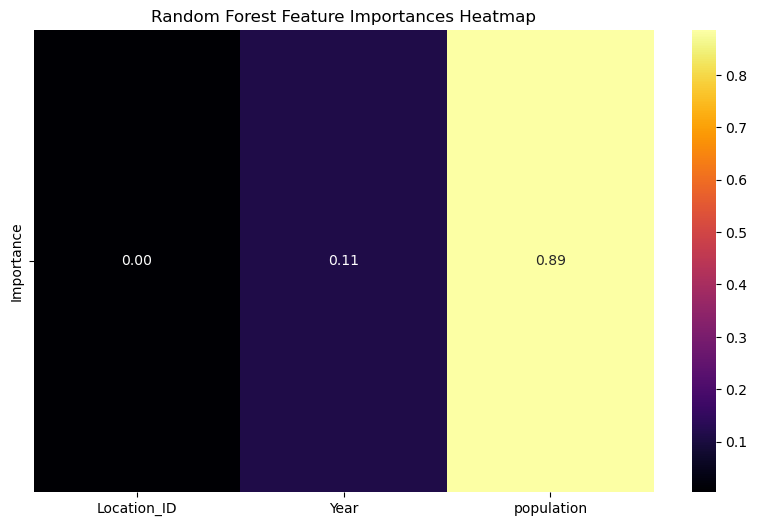

In [147]:
# Plot heatmap of random forest feature importances
plt.figure(figsize=(10, 6))
sns.heatmap(importances.reshape(1, -1), annot=True, fmt=".2f", cmap='inferno', xticklabels=feature_names, yticklabels=['Importance'])
plt.title('Random Forest Feature Importances Heatmap')
plt.show()

In [2]:
# final_merged_df.info()
# Save the final DataFrame to a CSV file
# final_merged_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\dataset\merged_data_final.csv", index=False)